In [150]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,mutual_info_classif,chi2, f_classif
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_curve, auc,confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
%matplotlib inline

In [151]:
data = pd.read_csv('../input/input.csv')
data = data.drop_duplicates()
data = data.dropna()
#Changing the column names to lower case
data.columns = [ x.lower().strip() for x in data.columns]
data.columns

Index(['ptid', 'persistency_flag', 'gender', 'race', 'ethnicity', 'region',
       'age_bucket', 'ntm_speciality', 'ntm_specialist_flag',
       'ntm_speciality_bucket', 'gluco_record_prior_ntm',
       'gluco_record_during_rx', 'dexa_freq_during_rx', 'dexa_during_rx',
       'frag_frac_prior_ntm', 'frag_frac_during_rx', 'risk_segment_prior_ntm',
       'tscore_bucket_prior_ntm', 'risk_segment_during_rx',
       'tscore_bucket_during_rx', 'change_t_score', 'change_risk_segment',
       'adherent_flag', 'idn_indicator', 'injectable_experience_during_rx',
       'comorb_encounter_for_screening_for_malignant_neoplasms',
       'comorb_encounter_for_immunization',
       'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
       'comorb_vitamin_d_deficiency',
       'comorb_other_joint_disorder_not_elsewhere_classified',
       'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
       'comorb_long_term_current_drug_therapy', 'comorb_dorsalgia',
       'com

In [152]:
data.shape

(3424, 69)

In [153]:
#Numeric columns present in the data
num_cols = data._get_numeric_data().columns
num_cols

Index(['dexa_freq_during_rx', 'count_of_risks'], dtype='object')

In [154]:
data.shape

(3424, 69)

In [155]:
data.describe(include='O')

,ptid,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,...,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,...,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,...,2,2,2,2,2,2,2,2,2,2
top,P1864,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,...,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


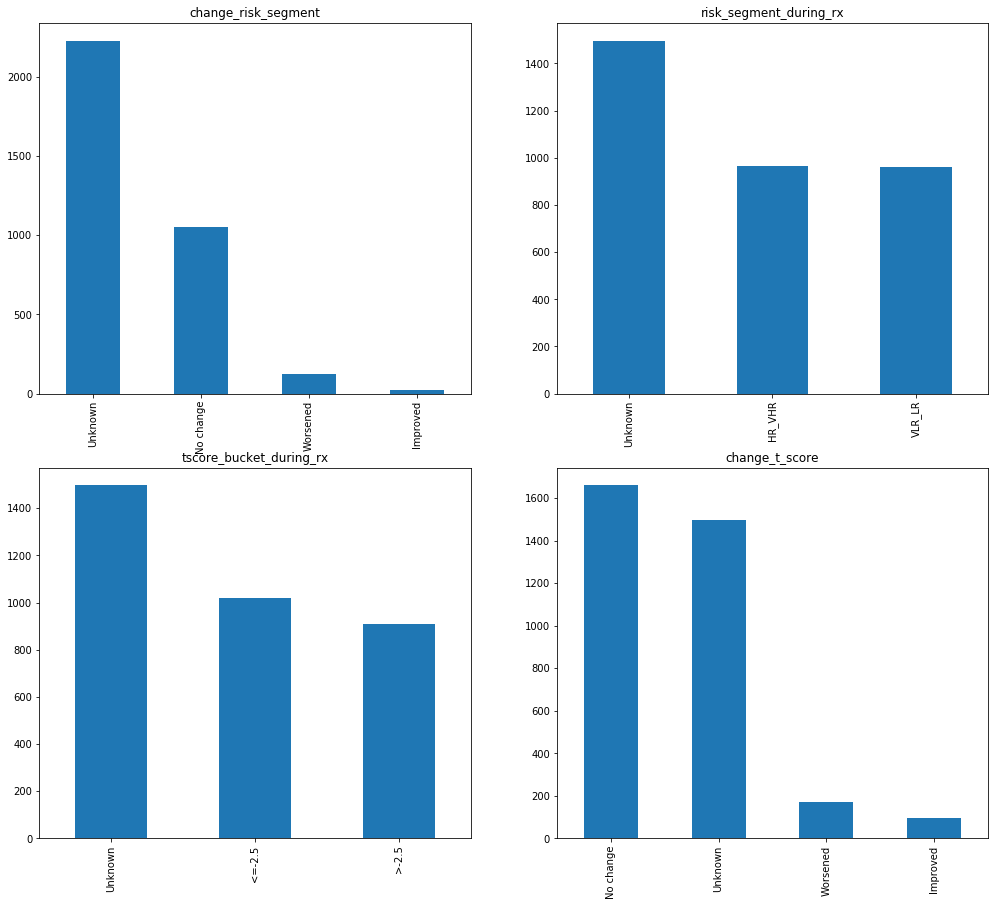

In [156]:
fig, axarr = plt.subplots(2, 2, figsize=(17, 15))
data['change_risk_segment'].value_counts().plot.bar(ax=axarr[0][0]).title.set_text('change_risk_segment')
data['risk_segment_during_rx'].value_counts().plot.bar(ax=axarr[0][1]).title.set_text('risk_segment_during_rx')
data['tscore_bucket_during_rx'].value_counts().plot.bar(ax=axarr[1][0]).title.set_text('tscore_bucket_during_rx')
data['change_t_score'].value_counts().plot.bar(ax=axarr[1][1]).title.set_text('change_t_score')

In [157]:
data = data.drop(['change_risk_segment'],axis = 1)

In [158]:
binary_cols = list(data.columns)

In [159]:
multiple_class = ['age_bucket','ntm_speciality','ntm_speciality_bucket','region','race','ethnicity','risk_segment_during_rx','tscore_bucket_during_rx','change_t_score']
for column in multiple_class:
    data[column] = data[column].astype('category')
    data[column] = le.fit_transform(data[column])

In [160]:
new_binary = []

In [161]:
for column in binary_cols:
    if column not in multiple_class:
        new_binary.append(column)

In [162]:
del new_binary[0]

In [163]:
new_binary

['persistency_flag',
 'gender',
 'ntm_specialist_flag',
 'gluco_record_prior_ntm',
 'gluco_record_during_rx',
 'dexa_freq_during_rx',
 'dexa_during_rx',
 'frag_frac_prior_ntm',
 'frag_frac_during_rx',
 'risk_segment_prior_ntm',
 'tscore_bucket_prior_ntm',
 'adherent_flag',
 'idn_indicator',
 'injectable_experience_during_rx',
 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
 'comorb_vitamin_d_deficiency',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx',
 'comorb_long_term_current_drug_therapy',
 'comorb_dorsalgia',
 'comorb_personal_history_of_other_diseases_and_conditions',
 'comorb_other_disorders_of_bone_density_and_structure',
 'comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias',
 'comorb_osteoporosis_without_current_pathological_fracture',
 'comorb_personal_history_of_maligna

In [164]:
# Using the class instance for label encoding that was created for grouping the relevant buckets
for col in new_binary:
    data[col] = le.fit_transform(data[col])

In [165]:
#Encoding features with multiple categories
multiple_class = ['age_bucket','ntm_speciality','ntm_speciality_bucket','region','race','ethnicity','risk_segment_during_rx','tscore_bucket_during_rx','change_t_score']
for column in multiple_class:
    data[column] = data[column].astype('category')
    data[column] = le.fit_transform(data[column])

In [166]:
data.shape

(3424, 68)

In [167]:
# Splitting the data into fetaures and target ( persistency_flag ).
features = data.copy()
target = features[['persistency_flag']]
features = features.drop(['ptid','persistency_flag'],axis=1)

In [191]:
#Creating the class instance for Select K Best module

fs = SelectKBest(score_func=chi2,k= 'all')
fs.fit(features , target.values.ravel())

ValueError: Found input variables with inconsistent numbers of samples: [3424, 4270]

In [171]:
feature_columns=features.columns
feature_list = []
for i in range(len(fs.scores_)):
    feature_list.append([feature_columns[i],fs.scores_[i]])
feature_df = pd.DataFrame(feature_list)
feature_df = feature_df.sort_values(1,ascending=False)
feature_df.columns = ['feature','score']
feature_df

,feature,score
11,dexa_during_rx,1091.855429
10,dexa_freq_during_rx,615.883189
28,comorb_long_term_current_drug_therapy,486.352971
22,comorb_encounter_for_screening_for_malignant_n...,396.729142
23,comorb_encounter_for_immunization,376.650551
...,...,...
1,race,0.014407
4,age_bucket,0.013368
2,ethnicity,0.009090
16,risk_segment_during_rx,0.001675


In [172]:
selected_columns = feature_df['feature'][:10].tolist()
selected_columns

['dexa_during_rx',
 'dexa_freq_during_rx',
 'comorb_long_term_current_drug_therapy',
 'comorb_encounter_for_screening_for_malignant_neoplasms',
 'comorb_encounter_for_immunization',
 'comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx',
 'comorb_other_disorders_of_bone_density_and_structure',
 'concom_systemic_corticosteroids_plain',
 'comorb_other_joint_disorder_not_elsewhere_classified',
 'concom_anaesthetics_general']

In [173]:
feature_df[:10]

,feature,score
11,dexa_during_rx,1091.855429
10,dexa_freq_during_rx,615.883189
28,comorb_long_term_current_drug_therapy,486.352971
22,comorb_encounter_for_screening_for_malignant_n...,396.729142
23,comorb_encounter_for_immunization,376.650551
24,"comorb_encntr_for_general_exam_w_o_complaint,_...",313.809201
31,comorb_other_disorders_of_bone_density_and_str...,222.880101
38,concom_systemic_corticosteroids_plain,214.471942
26,comorb_other_joint_disorder_not_elsewhere_clas...,196.939283
44,concom_anaesthetics_general,177.885055


In [174]:
feature_final = features[selected_columns]

In [176]:
feature_final.pop('dexa_during_rx')

0       0
1       0
2       0
3       0
4       0
       ..
3419    0
3420    0
3421    1
3422    0
3423    0
Name: dexa_during_rx, Length: 3424, dtype: int32

In [177]:
target['persistency_flag'].value_counts()

0    2135
1    1289
Name: persistency_flag, dtype: int64

In [178]:
oversample = SMOTE()
feature_final,target = oversample.fit_resample(feature_final, target)

In [179]:
target['persistency_flag'].value_counts()

1    2135
0    2135
Name: persistency_flag, dtype: int64

In [180]:
x_train, x_test,y_train, y_test = train_test_split(feature_final,target,train_size = 0.85, random_state = 8)

In [181]:
# A list to keep track of each model's performance

performance_list=[]

In [182]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train.values.ravel())
scores = cross_val_score(logreg,x_train,y_train.values.ravel(), scoring='f1_weighted', cv=10)
performance_list.append(['Logistic Regression',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.7716389825540879


In [183]:
neighbors = list(range(1, 50, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='f1_weighted')
    cv_scores.append([k,scores.mean()])
cv_scores

[[1, 0.7322489182856087],
 [3, 0.7600142096642538],
 [5, 0.774356750250543],
 [7, 0.7787774653207424],
 [9, 0.7864631565465396],
 [11, 0.7840494552583184],
 [13, 0.787046880138258],
 [15, 0.7862450812961752],
 [17, 0.7881892123691037],
 [19, 0.790371484786303],
 [21, 0.7872387080543807],
 [23, 0.7895157576998076],
 [25, 0.7883356713947093],
 [27, 0.7869933242735014],
 [29, 0.7905946943280109],
 [31, 0.7899560699773543],
 [33, 0.7861235311457293],
 [35, 0.7888883440892377],
 [37, 0.785204819506965],
 [39, 0.7883205494615739],
 [41, 0.7853824700434481],
 [43, 0.786795937765432],
 [45, 0.7862135097177625],
 [47, 0.7865090175506041],
 [49, 0.7851180820505406]]

In [184]:
knn = KNeighborsClassifier(n_neighbors = 19)
knn.fit(x_train,y_train.values.ravel())
scores = cross_val_score(knn,x_train,y_train.values.ravel(), scoring='f1_weighted', cv=10)
performance_list.append(['K Neighbours Classifiers',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.790371484786303


In [185]:
svc = SVC()
svc.fit(x_train,y_train.values.ravel())
scores = cross_val_score(svc,x_train,y_train.values.ravel(), scoring='f1_weighted', cv=10)
performance_list.append(['SVC',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.7815061965278567


In [186]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
scores = cross_val_score(dtc,x_train,y_train.values.ravel(), scoring='f1_weighted', cv=10)
performance_list.append(['Decision Tree',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.7755593439095262


In [187]:
random_forest = RandomForestClassifier(n_estimators= 150)
random_forest.fit(x_train, y_train.values.ravel())
scores = cross_val_score(random_forest,x_train,y_train.values.ravel(), scoring='f1_weighted', cv=10)
performance_list.append(['Random Forest',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.7885205311492813


In [194]:
xgb_model = xgb.XGBClassifier(n_jobs = -1, max_depth = 7, n_estimators = 100)
xgb_model.fit(x_train, y_train.values.ravel())
scores = cross_val_score(xgb_model,x_train,y_train.values.ravel(), scoring='f1_weighted', cv=10)
performance_list.append(['XGB Model',np.mean(scores)])
print('Mean ROC AUC',np.mean(scores))

Mean ROC AUC 0.7929967008460757


In [189]:
param_grid = {  "eta": [0.01, 0.015, 0.025], 
              "max_depth": [3, 5, 7, 9, 12],  
              "min_child_weight": [1,3,5,7] ,
             "gamma":[0.1,0.3,0.5]}
fit_params={"early_stopping_rounds":20,"eval_metric": "error","eval_set":[[x_test,y_test]]}

In [190]:
grid = GridSearchCV(estimator= xgb_model,  param_grid=param_grid,  scoring="f1_weighted", n_jobs=1,  cv= 5 ) 
grid.fit(x_train, y_train.values.ravel(), **fit_params)

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.20905
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21061
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22309
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[44]	validation_0-error:0.22309
[45]	validation_0-error:0.22309
Stopping. Best iteration:
[25]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.21061
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
Stopping. Best iteration:
[16]	validation_0-error:0.22153

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22777
Stopping. Best

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
Stopping. Best iteration:
[11]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21217
[12]	validation_0-error:0.21061
[13]	validation_0-error:0.20905
[14]	validation_0-error:0.20905
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21061
[17]	validation_0-error:0.21061
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21061
[20]	validation_0-error:0.20905
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21061
[23]	validation_0-error:0.21061
[24]	validation_0-error:0.21061
[25]	validation_0-error:0.21061
[26]	validation_0-error:0.21061
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
Stopping. Best iteration:
[13]	validation_0-error:0.20905

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.23089
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
Stopping. Best iteration:
[11]	validation_0-error:0.22309

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-error:0.23557
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
Stopping. Best iteration:
[17]	validation_0-error:0.22309

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
Stopping. Best iteration:
[11]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22153
[45]	validation_0-error:0.22153
Stopping. Best iteration:
[25]	validation_0-error:0.21685

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23401
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[42]	validation_0-error:0.22465
[43]	validation_0-error:0.22465
[44]	validation_0-error:0.22465
[45]	validation_0-error:0.22465
[46]	validation_0-error:0.22465
[47]	validation_0-error:0.22465
[48]	validation_0-error:0.22465
[49]	validation_0-error:0.22465
[50]	validation_0-error:0.22465
[51]	validation_0-error:0.22465
[52]	validation_0-error:0.22465
[53]	validation_0-error:0.22465
[54]	validation_0-error:0.22465
[55]	validation_0-error:0.22465
[56]	validation_0-error:0.22465
[57]	validation_0-error:0.22465
[58]	validation_0-error:0.22465
[59]	validation_0-error:0.22465
[60]	validation_0-error:0.22465
[61]	validation_0-error:0.22465
Stopping. Best iteration:
[41]	validation_0-error:0.22309

[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21841
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22153
[6]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.23089
[4]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23089
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24181
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.24181
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.24337
[20]	validation_0-error:0.24649
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24337
[23]	validation_0-error:0.24493
[24]	validation_0-error:0.24493
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.22777

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.22153
[4]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23557
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
[30]	validation_0-error:0.24337
[31]	validation_0-error:0.24181
[32]	validation_0-error:0.23713
[33]	validation_0-error:0.23713
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23401
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[38]	validation_0-error:0.22777
[39]	validation_0-error:0.22777
[40]	validation_0-error:0.22777
[41]	validation_0-error:0.22309
Stopping. Best iteration:
[21]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21841
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.23713
[6]	validation_0-error:0.24961
[7]	validation_0-error:0.24493
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.24181
[17]	validation_0-error:0.24337
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.23557
Stopping. Best iteration:
[2]	validation_0-error:0.22777

[0]	validation_0-error:0.24805
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.2

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
[28]	validation_0-error:0.23713
Stopping. Best iteration:
[8]	validation_0-error:0.21997

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22777
[4]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
Stopping. Best iteration:
[14]	validation_0-error:0.21061

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21373
[16]	validation_0-error:0.21373
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21217
[20]	validation_0-error:0.21061
[21]	validation_0-error:0.21061
[22]	validation_0-error:0.21061
[23]	validation_0-error:0.20905
[24]	validation_0-error:0.21217
[25]	validation_0-error:0.21217
[26]	validation_0-error:0.21217
[27]	validation_0-error:0.21217
[28]	validation_0-error:0.21217
[29]	validation_0-error:0.21217
[30]	validation_0-error:0.21217
[31]	validation_0-error:0.21061
[32]	validation_0-error:0.21061
[33]	validation_0-error:0.21061
[34]	validation_0-error:0.21061
[35]	validation_0-error:0.21061
[36]	validati

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
Stopping. Best iteration:
[0]	validation_0-error:0.21685

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21061
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23713
[37]	validation_0-error:0.23713
[38]	validation_0-error:0.23713
[39]	validation_0-error:0.23713
[40]	validation_0-error:0.23713
[41]	validation_0-error:0.23713
Stopping. Best iteration:
[21]	validation_0-error:0.22777

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23713
[19]	validation_0-error:0.23401
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
Stopping. Best iteration:
[11]	validation_0-error:0.22153

[0]	validation_0-error:0.23869
Will train until val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.24181
[22]	validation_0-error:0.24181
[23]	validation_0-error:0.24337
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.24181
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
Stopping. Best iteration:
[9]	validation_0-error:0.22465

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21529
[8]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22933
Stopping. Best iteration:
[9]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22309
[37]	validat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22621
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[39]	validation_0-error:0.20593
[40]	validation_0-error:0.20593
[41]	validation_0-error:0.20593
[42]	validation_0-error:0.20593
[43]	validation_0-error:0.20593
[44]	validation_0-error:0.20593
[45]	validation_0-error:0.20593
[46]	validation_0-error:0.20593
[47]	validation_0-error:0.20593
[48]	validation_0-error:0.20593
[49]	validation_0-error:0.20593
Stopping. Best iteration:
[29]	validation_0-error:0.20593

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23401
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[16]	validation_0-error:0.23245

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21685
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iterat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
Stopping. Best iteration:
[10]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
[42]	validation_0-error:0.21841
[43]	validation_0-error:0.21841
[44]	validation_0-error:0.21841
[45]	validation_0-error:0.21841
[46]	validation_0-error:0.21685
[47]	validation_0-error:0.21685
[48]	validation_0-error:0.21685
[49]	validation_0-error:0.21685
[50]	validation_0-error:0.21685
[51]	validation_0-error:0.21529
[52]	validation_0-error:0.21529
[53]	validation_0-error:0.21529
[54]	validation_0-error:0.21529
[55]	validation_0-error:0.21529
[56]	validation_0-error:0.21685
[57]	validation_0-error:0.21685
[58]	validation_0-error:0.21841
[59]	validation_0-error:0.21685
[60]	validation_0-error:0.21529
[61]	validation_0-error:0.21529
[62]	validation_0-error:0.21529
[63]	validation_0-error:0.21529
[64]	validation_0-error:0.21529
[65]	validation_0-error:0.21529
[66]	validation_0-error:0.21529
[67]	validation_0-error:0.21529
[68]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.23401
[10]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23713
Stopping. Best iteration:
[3]	validation_0-error:0.23089

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22465
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.23089
Stopping. Best iteration:
[10]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until vali

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.23245
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
Stopping. Best iteration:
[16]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22465
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.24181
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22465
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.23401
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23401
[36]	validation_0-error:0.23089
[37]	validation_0-error:0.23557
[38]	validation_0-error:0.22777
Stopping. Best iteration:
[18]	validation_0-error:0.22465

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21217
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
Stopping. Best iteration:
[9]	validation_0-error:0.21217

[0]	validation_0-error:0.23089
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.21997
[37]	validation_0-error:0.21997
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.21997
[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.21997
[43]	validation_0-error:0.21997
[44]	validation_0-error:0.21997
[45]	validation_0-error:0.21997
[46]	validation_0-error:0.21841
[47]	validation_0-error:0.21841
[48]	validation_0-error:0.21841
[49]	validation_0-error:0.21841
[50]	validation_0-error:0.21841
[51]	validation_0-error:0.21841
[52]	validation_0-error:0.21841
[53]	validation_0-error:0.21841
[54]	validation_0-error:0.21841
[55]	validation_0-error:0.21841
[56]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
Stopping. Best iteration:
[21]	validation_0-error:0.21373

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.20593
[28]	validation_0-error:0.20749
[29]	validation_0-error:0.20749
[30]	validation_0-error:0.20593
[31]	validation_0-error:0.20593
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20437
[35]	validation_0-error:0.20437
[36]	validation_0-error:0.20437
[37]	validation_0-error:0.20437
[38]	validation_0-error:0.20437
[39]	validation_0-error:0.20437
[40]	validation_0-error:0.20437
[41]	validation_0-error:0.20437
[42]	validation_0-error:0.20437
[43]	validation_0-error:0.20437
[44]	validation_0-error:0.20437
[45]	validation_0-error:0.20437
[46]	validation_0-error:0.20437
[47]	validation_0-error:0.20437
[48]	validation_0-error:0.20437
[49]	validation_0-error:0.20437
[50]	validation_0-error:0.20437
[51]	validation_0-error:0.20437
[52]	validation_0-error:0.20437
[53]	validation_0-error:0.20281
[54]	validation_0-error:0.20281
[55]	validation_0-error:0.20281
[56]	validation_0-error:0.20437
[57]	validation_0-error:0.20437
[58]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.21841
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
Stopping. B

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.21997
[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.22309
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.21997
[46]	validation_0-error:0.22153
[47]	validation_0-error:0.22153
[48]	validation_0-error:0.22153
[49]	validation_0-error:0.21997
[50]	validation_0-error:0.22153
Stopping. Best iteration:
[30]	validation_0-error:0.21841

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21373
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.23245
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22777
[36]	validation_0-error:0.22933
[37]	validation_0-error:0.23089
[38]	validation_0-error:0.22933
[39]	validation_0-error:0.23089
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.22933
[42]	validation_0-error:0.22933
[43]	validation_0-error:0.23089
[44]	validation_0-error:0.22933
[45]	validation_0-error:0.23869
[46]	validation_0-error:0.23869
[47]	validation_0-error:0.23869
[48]	validation_0-error:0.23869
[49]	validation_0-error:0.23869
[50]	validation_0-error:0.23713
[51]	validation_0-error:0.22933
[52]	validation_0-error:0.23557
[53]	validation_0-error:0.23557
[54]	validation_0-error:0.23557
Stopping. Best iteration:
[34]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23245
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23245
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_0-error:0.24181
[30]	validation_0-error:0.23713
Stopping. Best iteration:
[10]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22309
Stopping. Best iteration:
[17]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.24181
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.23089
[31]	validation_0-error:0.22933
Stopping. Best iteration:
[11]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21217
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22621
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
Stopping. Best iteration:
[9]	validation_0-error:0.21217

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.20905
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21373
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.21997
[43]	validation_0-error:0.21997
[44]	validation_0-error:0.21997
[45]	validation_0-error:0.21997
Stopping. Best iteration:
[25]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
Stopping. Best

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.26365
Will train until valid

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-error:0.22309
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
Stopping. Best iteration:
[11]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
Stopping. Best iteration:
[10]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24493
[15]	validation_0-error:0.24337
[16]	validation_0-error:0.24493
[17]	validation_0-error:0.24493
[18]	validation_0-error:0.24493
[19]	validation_0-error:0.24337
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.23245
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.23089
[31]	validation_0-error:0.23089
[32]	validation_0-error:0.23089
[33]	validation_0-error:0.23089
[34]	validation_0-error:0.23089
[35]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23557
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22465
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
Stopping. Best iteration:
[4]	validation_0-error:0.21997

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21529
[7]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24181
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.24337
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.24181
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24181
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23713
Stopping. Best iteration:
[6]	validation_0-error:0.23089

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24337
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.24337
[27]	validation_0-error:0.24025
[28]	validation_0-error:0.23713
[29]	validation_0-error:0.24025
[30]	validation_0-error:0.24181
[31]	validation_0-error:0.24181
Stopping. Best iteration:
[11]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22465
Stopping. Best iteration:
[12]	validation_0-error:0.21841

[0]	validation_0-error:0.25429
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22933
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.23245
[4]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21373
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best i

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21841
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22465
[42]	validation_0-error:0.22465
[43]	validation_0-error:0.22465
[44]	validation_0-error:0.22465
[45]	validation_0-error:0.22465
Stopping. Best iteration:
[25]	validation_0-error:0.21373

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23713
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23401
[14]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[9]	validation_0-error:0.22621

[0]	validation_0-error:0.21685
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21685
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
Stopping. Best iteration:
[16]	validation_0-error:0.21529

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.21685
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21217
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.20905
[14]	validation_0-error:0.21061
[15]	validation_0-error:0.21061
[16]	validation_0-error:0.21061
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21373
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.21685
Stopping. Best iteration:
[13]	validation_0-error:0.20905

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22777
Stopping. Best iteration:
[12]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.25429
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24961
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23245
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.23401
[33]	validation_0-error:0.23401
[34]	validation_0-error:0.23401
[35]	validation_0-error:0.23401
[36]	validation_0-error:0.23401
[37]	validation_0-error:0.23401
[38]	validation_0-error:0.23401
[39]	validation_0-error:0.23401
[40]	validation_0-error:0.23245
[41]	validation_0-error:0.23245
Stopping. Best iteration:
[21]	validation_0-error:0.22621

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23401
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
Stopping. Best iteration:
[17]	validation_0-error:0.21997

[0]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[41]	validation_0-error:0.23557
[42]	validation_0-error:0.23401
[43]	validation_0-error:0.23401
[44]	validation_0-error:0.23713
[45]	validation_0-error:0.23401
[46]	validation_0-error:0.23245
[47]	validation_0-error:0.23089
[48]	validation_0-error:0.23245
[49]	validation_0-error:0.23089
[50]	validation_0-error:0.23245
Stopping. Best iteration:
[30]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23401
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[39]	validation_0-error:0.24025
Stopping. Best iteration:
[19]	validation_0-error:0.22777

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23245
[26]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
Stopping. Best iteration:
[10]	validation_0-error:0.21685

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-error:0.23557
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22465
[42]	validation_0-error:0.22465
[43]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.21841
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22933
[35]	validation_0-error:0.22933
[36]	validation_0-error:0.22933
[37]	validation_0-error:0.22933
[38]	validation_0-error:0.22933
Stopping. Best iteration:
[18]	validation_0-error:0.21529

[0]	validation_0-error:0.22933
Will train unt

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	validation_0-error:0.22621
Stopping. Best iteration:
[20]	validation_0-error:0.22309

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
[35]	validation_0-error:0.21685
[36]	validation_0-error:0.21685
[37]	validation_0-error:0.21685
[38]	validation_0-error:0.21685
[39]	validation_0-error:0.21685
[40]	validation_0-error:0.21685
[41]	validation_0-error:0.21685
[42]	validation_0-error:0.21685
[43]	validation_0-error:0.21685
[44]	validation_0-error:0.21685
[45]	validation_0-error:0.21685
[46]	validation_0-error:0.21685
[47]	validation_0-error:0.21685
[48]	validation_0-error:0.21685
Stopping. Best iteration:
[28]	validation_0-error:0.21685

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21997
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24025
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.23869
[10]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23713
[30]	validation_0-error:0.23713
[31]	validation_0-error:0.23557
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23557
[37]	validation_0-error:0.23557
Stopping. Best iteration:
[17]	validation_0-error:0.23557

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22309
[9]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.22153
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
[35]	validation_0-error:0.21685
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
Stopping. Best iteration:
[18]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22465
Stopping. Best iteration:
[9]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.24181
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.22309
[46]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22777
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
Stopping. Best iteration:
[2]	validation_0-error:0.22621

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21841
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.21841

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23557
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.22933

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.24025
[17]	validation_0-error:0.23869


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.23869
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
[23]	validation_0-error:0.24025
[24]	validation_0-error:0.24025
Stopping. Best iteration:
[4]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.22309
[20]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22777
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.23089
[37]	validation_0-error:0.23089
[38]	validation_0-error:0.23089
Stopping. Best iteration:
[18]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21841
[11]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.21841
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22777
Stopping. Best iteration:
[15]	validation_0-error:0.21373

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.23557
[24]	validation_0-error:0.23089
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24649
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.23089
[31]	validation_0-error:0.23089
[32]	validation_0-error:0.23089
[33]	validation_0-error:0.23089
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22153
[45]	validation_0-error:0.22153
[46]	validation_0-error:0.22153
[47]	validation_0-error:0.22153
[48]	validation_0-error:0.22309
[49]	validation_0-error:0.22309
[50]	validation_0-error:0.22153
[51]	validation_0-error:0.22153
[52]	validation_0-error:0.22153
[53]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22309


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.21997


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
Stopping. Best iteration:
[17]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21373
[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validation_0-error:0.21529
[36]	validation_0-error:0.21529
[37]	validation_0-error:0.21529
[38]	validation_0-error:0.21529
[39]	validation_0-error:0.21529
[40]	validation_0-error:0.21529
Stopping. Best iteration:
[20]	validation_0-error:0.21373

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20593
[35]	validation_0-error:0.20593
[36]	validation_0-error:0.20593
[37]	validation_0-error:0.20593
[38]	validation_0-error:0.20593
[39]	validation_0-error:0.20593
[40]	validation_0-error:0.20593
[41]	validation_0-error:0.20593
[42]	validation_0-error:0.20593
[43]	validation_0-error:0.20593
[44]	validation_0-error:0.20593
[45]	validation_0-error:0.20593
[46]	validation_0-error:0.20593
[47]	validation_0-error:0.20593
[48]	validation_0-error:0.20593
[49]	validation_0-error:0.20593
[50]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23557
[30]	validation_0-error:0.23557
[31]	validation_0-error:0.23557
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23713
[37]	validation_0-error:0.23713
[38]	validation_0-error:0.23713
[39]	validation_0-error:0.23557
[40]	validation_0-error:0.23557
Stopping. Best iteration:
[20]	validation_0-error:0.23245

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21997
[2]	validation_0-error:0.22153
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
Stopping. Best iteration:
[9]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
Stopping. Best iteration:
[9]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23245
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.23245
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
Stopping. Best iteration:
[19]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.23245
Stopping. Best iteration:
[4]	validation_0-error:0.22933

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error:0.21841

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
[28]	validation_0-error:0.23713
Stopping. Best iteration:
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.22465
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.22777
Stopping. Best iteration:
[4]	validation_0-error:0.221

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24649
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22309
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21217
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21685
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
Stopping. Best iteration:
[14]	validation_0-error:0.21217

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22465
[42]	validation_0-error:0.22465
[43]	validation_0-error:0.22465
[44]	validation_0-error:0.22465
[45]	validation_0-error:0.22465
[46]	validation_0-error:0.22465
[47]	validation_0-error:0.22465
[48]	validation_0-error:0.22465
[49]	validation_0-error:0.22465
[50]	validation_0-error:0.22465
[51]	validation_0-error:0.22465
Stopping. Best iteration:
[31]	validation_0-error:0.22153

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[44]	validation_0-error:0.22933
[45]	validation_0-error:0.22933
[46]	validation_0-error:0.22933
Stopping. Best iteration:
[26]	validation_0-error:0.22621

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.22465
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22777
[33]	validation_0-error:0.22777
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
Stopping. Best iteration:
[11]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.23089
[9]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[44]	validation_0-error:0.22621
[45]	validation_0-error:0.22621
[46]	validation_0-error:0.22621
Stopping. Best iteration:
[26]	validation_0-error:0.22621

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
Stopping. Best iteration:
[9]	validation_0-error:0.21997

[0]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21373
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21373
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
Stopping. Best iteration:
[11]	validation_0-error:0.21373

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.23401
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
[23]	validation_0-error:0.24181
[24]	validation_0-error:0.24181
[25]	validation_0-error:0.24181
[26]	validation_0-error:0.24337
[27]	validation_0-error:0.24181
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
Stopping. Best 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
Stopping. Best iteration:
[6]	validation_0-error:0.21529

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21841
[9]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
Stopping. Best iteration:
[4]	validation_0-error:0.21997

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.24181
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.23869
[12]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22933
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	vali

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.23089
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25429
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23713
Stopping. Best iteration:
[2]	validation_0-error:0.22777

[0]	validation_0-error:0.24805
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22777
Stopping. Best iteration:
[12]	validation_0-error:0.22153

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.23245
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
Stopping. Best iteration:
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.23089
[35]	validation_0-error:0.23401
[36]	validation_0-error:0.23401
Stopping. Best iteration:
[16]	validation_0-error:0.22777

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23713
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24025
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.24025
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21841
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
Stopping. Best iteration:
[0]	validation_0-error:0.21529

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23089
[5]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
Stopping. Best iteration:
[15]	validation_0-error:0.21217

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.24805
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23869
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.24337
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21997

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21373
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23089
Stopping. Best iteration:
[6]	validation_0-error:0.21373

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.24337
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.24025
[27]	validation_0-error:0.24025
[28]	validation_0-error:0.24025
Stopping. Best iteration:
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22933
[35]	validation_0-error:0.22933
[36]	validation_0-error:0.22933
[37]	validation_0-error:0.22933
[38]	validation_0-error:0.22933
[39]	validation_0-error:0.22933
[40]	validation_0-error:0.22933
[41]	validation_0-error:0.22933
[42]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23245
Stopping. Best iteration:
[6]	validation_0-error:0.21997

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22777
[5]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21685
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
Stopping. Best iteration:
[21]	validation_0-error:0.20905

[0]	validation_0-error:0.24025
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23869
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.24025
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24025
[21]	validation_0-error:0.24025
[22]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
Stopping. Best iteration:
[0]	validation_0-error:0.21997

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.21

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23245
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_0-error:0.23245
[30]	validation_0-error:0.23245
[31]	validation_0-error:0.23245
Stopping. Best iteration:
[11]	validation_0-error:0.23089

[0]	validation_0-error:0.25585
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
Stopping. Best iteration:
[5]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21841
[10]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24337
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.23089
[36]	validation_0-error:0.23089
Stopping. Best iteration:
[16]	validation_0-error:0.22777

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.23089
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[38]	validation_0-error:0.23869
[39]	validation_0-error:0.23869
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.23869
[42]	validation_0-error:0.23869
Stopping. Best iteration:
[22]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.21373
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.23401
[22]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21685
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24337
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-error:0.23869
[32]	validation_0-error:0.23869
[33]	validation_0-error:0.23869
Stopping. Best iteration:
[13]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22777
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
Stopping. Best iteration:
[1]	validation_0-error:0.22465

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
[42]	validation_0-error:0.21373
[43]	validation_0-error:0.21373
[44]	validation_0-error:0.21373
[45]	validation_0-error:0.21373
[46]	validation_0-error:0.21373
[47]	validation_0-error:0.21373
[48]	validation_0-error:0.21373
Stopping

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
Stopping. Best iteration:
[11]	validation_0-error:0.21685

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.24181
[6]	validation_0-error:0.24493
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.24025
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
Stopping. Best iteration:
[7]	validation_0-error:0.23557

[0]	validation_0-error:0.21997
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21997
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validation_0-error:0.21529
[36]	validation_0-error:0.21529
[37]	validation_0-error:0.21529
[38]	validation_0-error:0.21529
[39]	validation_0-error:0.21529
[40]	validation_0-error:0.21529
[41]	validation_0-error:0.21529
[42]	validation_0-error:0.21529
[43]	validation_0-error:0.21529
[44]	validation_0-error:0.21529
[45]	validation_0-error:0.21529
[46]	validation_0-error:0.21529
[47]	validation_0-error:0.21529
[48]	validation_0-error:0.21529
Stopping. Best iteration:
[28]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
Stopping. Best iteration:
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.23245
[31]	validation_0-error:0.22933
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21997

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24337
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23869
[29]	validation_0-error:0.23869
[30]	validation_0-error:0.23869
[31]	validation_0-error:0.23869
[32]	validation_0-error:0.23869
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21997
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
Stopping. Best iteration:
[22]	validation_0-error:0.21685

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24337
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22309
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22621
[41]	validation_0-error:0.22621
[42]	validation_0-error:0.22621
[43]	validation_0-error:0.22621
[44]	validation_0-error:0.22621
[45]	validation_0-error:0.22621
[46]	validation_0-error:0.22621
[47]	validation_0-error:0.22621
[48]	validation_0-error:0.22621
[49]	validation_0-error:0.22621
[50]	validation_0-error:0.22621
[51]	validation_0-error:0.22621
[52]	validation_0-error:0.22621
[53]	validation_0-error:0.22621
Stopping. Best iteration:
[33]	validation_0-error:0.21997

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.24337
[6]	validation_0-error:0.24181
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.23089
[9]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[13]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
Stopping. Best iterat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.20905
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21061
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
Stopping. Best iteration:
[17]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-error:0.24025
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.21997
[37]	validation_0-error:0.21997
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.21997
[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.21997
[43]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.23557
[6]	validation_0-error:0.24493
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validati

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
Stopping. Best iteration:
[11]	validation_0-error:0.21841

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21217
[12]	validation_0-error:0.21061
[13]	validation_0-error:0.20905
[14]	validation_0-error:0.20905
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21061
[17]	validation_0-error:0.21061
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21061
[20]	validation_0-error:0.20905
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21061
[23]	validation_0-error:0.21061
[24]	validation_0-error:0.21061
[25]	validation_0-error:0.21061
[26]	validation_0-error:0.21061
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
Stopping. Best iteration:
[11]	validation_0-error:0.22309

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
Stopping. Best iteration:
[17]	validation_0-error:0.22309

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't imp

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
Stopping. Best iteration:
[11]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.24493
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22621
[9]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22777
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22933
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validation_0-error:0.21529
[36]	validation_0-error:0.21529
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22777
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22309
[7]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.23401
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24181
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.24181
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.24337
[20]	validation_0-error:0.24649
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24337
[23]	validation_0-error:0.24493
[24]	validation_0-error:0.24493
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.22777

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21997
[9]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23557
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
[30]	validation_0-error:0.24337
[31]	validation_0-error:0.24181
[32]	validation_0-error:0.23713
[33]	validation_0-error:0.23713
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23869
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22621
Stopping. Best iteration:
[10]	validation_0-error:0.21841

[0]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22621
Stopping. Best iteration:
[6]	validation_0-error:0.21685

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22933
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23401
[18]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21373
[10]	validation_0-error:0.21217
[11]	validation_0-error:0.21217
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21061
[15]	validation_0-error:0.21061
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
Stopping. Best iteration:
[14]	validation_0-error:0.21061

[0]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.26053
[2]	validation_0-error:0.25897
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21373
[16]	validation_0-error:0.21373
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21217
[20]	validation_0-error:0.21061
[21]	validation_0-error:0.21061
[22]	validation_0-error:0.21061
[23]	validation_0-error:0.20905
[24]	validation_0-error:0.21217
[25]	validation_0-error:0.21217
[26]	validation_0-error:0.21217
[27]	validation_0-error:0.21217
[28]	validation_0-error:0.21217
[29]	validation_0-error:0.21217
[30]	validation_0-error:0.21217
[31]	validation_0-error:0.21061
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
Stopping. Best iteration:
[0]	validation_0-error:0.21685

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21061
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.2

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23713
[37]	validation_0-error:0.23713
[38]	validation_0-error:0.23713
[39]	validation_0-error:0.23713
[40]	validation_0-error:0.23713
[41]	validation_0-error:0.23713
Stopping. Best iteration:
[21]	validation_0-error:0.22777

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23557
[18]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
Stopping. Best iteration:
[11]	validation_0-error:0.22153

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.24181
[22]	validation_0-error:0.24181
[23]	validation_0-error:0.24337
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.24181
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
Stopping. Best iteration:
[9]	validation_0-error:0.22465

[0]	validation_0-error:0.22465
Will train until valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22933
Stopping. Best iteration:
[9]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[15]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21217
[38]	validation_0-error:0.21217
[39]	validation_0-error:0.21217
[40]	validation_0-error:0.21217
[41]	validation_0-error:0.21217
[42]	validation_0-error:0.21217
[43]	validation_0-error:0.21217
[44]	validation_0-error:0.21217
[45]	validation_0-error:0.21217
[46]	validation_0-error:0.21217
[47]	validation_0-error:0.21217
[48]	validation_0-error:0.21217
[49]	validation_0-error:0.21217
[50]	validation_0-error:0.21217
[51]	validation_0-error:0.21217
[52]	validation_0-error:0.21217
[53]	validation_0-error:0.21217
[54]	validation_0-error:0.21217
[55]	validation_0-error:0.21217
[56]	validation_0-error:0.21217
[57]	validation_0-error:0.21217
Stopping. Best iteration:
[37]	validation_0-error:0.21217

[0]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.20749
[25]	validation_0-error:0.20749
[26]	validation_0-error:0.20749
[27]	validation_0-error:0.20749
[28]	validation_0-error:0.20749
[29]	validation_0-error:0.20593
[30]	validation_0-error:0.20593
[31]	validation_0-error:0.20593
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20593
[35]	validation_0-error:0.20593
[36]	validation_0-error:0.20593
[37]	validation_0-error:0.20593
[38]	validation_0-error:0.20593
[39]	validation_0-error:0.20593
[40]	validation_0-error:0.20593
[41]	validation_0-error:0.20593
[42]	validation_0-error:0.20593
[43]	validation_0-error:0.20593
[44]	validation_0-error:0.20593
[45]	validation_0-error:0.20593
[46]	validation_0-error:0.20593
[47]	validation_0-error:0.20593
[48]	validation_0-error:0.20593
[49]	validation_0-error:0.20593
Stopping. Best iteration:
[29]	validation_0-error:0.20593

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validati

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.23869
[29]	validation_0-error:0.23869
[30]	validation_0-error:0.23869
[31]	validation_0-error:0.23713
[32]	validation_0-error:0.23713
[33]	validation_0-error:0.23713
[34]	validation_0-error:0.23713
[35]	validation_0-error:0.23713
[36]	validation_0-error:0.23713
Stopping. Best iteration:
[16]	validation_0-error:0.23245

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22309


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
Stopping. Best iteration:
[10]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22621
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.22153
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
[42]	validation_0-error:0.21841
[43]	validation_0-error:0.21841
[44]	validation_0-error:0.21841
[45]	validation_0-error:0.21841
[46]	validation_0-error:0.21685
[47]	validation_0-error:0.21685
[48]	validation_0-error:0.21685
[49]	validation_0-error:0.21685
[50]	validation_0-error:0.21685
[51]	validation_0-error:0.21529
[52]	validation_0-error:0.21529
[53]	validation_0-error:0.21529
[54]	validation_0-error:0.21529
[55]	validation_0-error:0.21529
[56]	validation_0-error:0.21685
[57]	validation_0-error:0.21685
[58]	validation_0-error:0.21841
[59]	validation_0-error:0.21685
[60]	validation_0-error:0.21529
[61]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23557
Stopping. Best iteration:
[4]	validation_0-error:0.23245

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22153


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.24025
[16]	validation_0-error:0.24025
[17]	validation_0-error:0.24181
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23869


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
Stopping. Best iteration:
[7]	validation_0-error:0.23245

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24025
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23713
Stopping. Best iteration:
[3]	validation_0-error:0.23089

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.23713
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.23089
Stopping. Best iteration:
[10]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.23245
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
Stopping. Best iteration:
[16]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.22465
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.24181
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
Stopping. Best iteration:
[18]	validation_0-error:0.21841

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24025
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22933
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.23245
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.23245
[31]	validation_0-error:0.23089
[32]	validation_0-error:0.23245
[33]	validation_0-error:0.23401
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23401
[36]	validation_0-error:0.23089
[37]	validation_0-error:0.23557
[38]	validation_0-error:0.22777
Stopping. Best iteration:
[18]	validation_0-error:0.22465

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21217
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
Stopping. Best iteration:
[9]	validation_0-error:0.21217

[0]	validation_0-error:0.23089
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.21997
[37]	validation_0-error:0.21997
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.21997
[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.21997
[43]	validation_0-error:0.21997
[44]	validation_0-error:0.21997
[45]	validation_0-error:0.21997
[46]	validation_0-error:0.21841
[47]	validation_0-error:0.21841
[48]	validation_0-error:0.21841
[49]	validation_0-error:0.21841
[50]	validation_0-error:0.21841
[51]	validation_0-error:0.21841
[52]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
Stopping. Best iteration:
[21]	validation_0-error:0.21373

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.20749
[25]	validation_0-error:0.20749
[26]	validation_0-error:0.20749
[27]	validation_0-error:0.20593
[28]	validation_0-error:0.20749
[29]	validation_0-error:0.20749
[30]	validation_0-error:0.20593
[31]	validation_0-error:0.20593
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20437
[35]	validation_0-error:0.20437
[36]	validation_0-error:0.20437
[37]	validation_0-error:0.20437
[38]	validation_0-error:0.20437
[39]	validation_0-error:0.20437
[40]	validation_0-error:0.20437
[41]	validation_0-error:0.20437
[42]	validation_0-error:0.20437
[43]	validation_0-error:0.20437
[44]	validation_0-error:0.20437
[45]	validation_0-error:0.20437
[46]	validation_0-error:0.20437
[47]	validation_0-error:0.20437
[48]	validation_0-error:0.20437
[49]	validation_0-error:0.20437
[50]	validation_0-error:0.20437
[51]	validation_0-error:0.20437
[52]	validation_0-error:0.20437
[53]	validation_0-error:0.20281
[54]	validation_0-error:0.20281
[55]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23713
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
Stopping. Best iteration:
[6]	validation_0-error:0.23557

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21841
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.21997
Stopping. Best iteration:
[12]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22465
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
Stopping. Best iteration:
[3]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21997


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
Stopping. Best iteration:
[17]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24025
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.21997
[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.22309
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.21997
[46]	validation_0-error:0.22153
[47]	validation_0-error:0.22153
[48]	validation_0-error:0.22153
[49]	validation_0-error:0.21997
[50]	validation_0-error:0.22153
Stopping. Best iteration:
[30]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.24337
[21]	validation_0-error:0.24337
[22]	validation_0-error:0.24337
[23]	validation_0-error:0.24337
[24]	validation_0-error:0.24025
Stopping. Best iteration:
[4]	validation_0-error:0.23245

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21373
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22621


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23713
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.24025
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22621


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.22621
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23713
[29]	validation_0-error:0.23401
[30]	validation_0-error:0.23557
[31]	validation_0-error:0.23713
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23245
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22777
[36]	validation_0-error:0.22933
[37]	validation_0-error:0.23089
[38]	validation_0-error:0.22933
[39]	validation_0-error:0.23089
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.22933
[42]	validation_0-error:0.22933
[43]	validation_0-error:0.23089
[44]	validation_0-error:0.22933
[45]	validation_0-error:0.23869
[46]	validation_0-error:0.23869
[47]	validation_0-error:0.23869
[48]	validation_0-error:0.23869
[49]	validation_0-error:0.23869
[50]	validation_0-error:0.23713
[51]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23245
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.23089
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22309
Stopping. Best iteration:
[17]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22933
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.24181
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.23089
[31]	validation_0-error:0.22933
Stopping. Best iteration:
[11]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21217
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22777
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.20905
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21373
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.24805
[8]	validation_0-error:0.24961
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.22777
[38]	validation_0-error:0.22777
[39]	validation_0-error:0.22777
[40]	validation_0-error:0.22777
[41]	validation_0-error:0.22777
[42]	validation_0-error:0.22777
[43]	validation_0-error:0.22933
[44]	validation_0-error:0.22933
[45]	validation_0-error:0.22933
[46]	validation_0-error:0.22933
[47]	validation_0-error:0.22933
[48]	validation_0-error:0.22933
[49]	validation_0-error:0.22933
[50]	validation_0-error:0.22933
Stopping. Best iteration:
[30]	validation_0-error:0.22777

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22777
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
Stopping. Best iteration:
[10]	validation_0-error:0.22777

[0]	validation_0-error:0.26209
Will train until vali

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
Stopping. Best iteration:
[10]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.21997
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.21997
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.22153
Stopping. Best iteration:
[19]	validation_0-error:0.21373

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24493
[15]	validation_0-error:0.24337
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.23089
[38]	validation_0-error:0.23089
[39]	validation_0-error:0.23089
[40]	validation_0-error:0.23089
[41]	validation_0-error:0.23089
[42]	validation_0-error:0.23089
[43]	validation_0-error:0.23089
[44]	validation_0-error:0.23089
[45]	validation_0-error:0.23089
Stopping. Best iteration:
[25]	validation_0-error:0.22465

[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23557
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
Stopping. Best iteration:
[4]	validation_0-error:0.21997

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.24181
[4]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24181
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.24337
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.24181
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24181
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23713
Stopping. Best iteration:
[6]	validation_0-error:0.23089

[0]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24337
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.24337
[27]	validation_0-error:0.24025
[28]	validation_0-error:0.23713
[29]	validation_0-error:0.24025
[30]	validation_0-error:0.24181
[31]	validation_0-error:0.24181
Stopping. Best iteration:
[11]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24181
[3]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22933
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23557
[7]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21373
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best i

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
[42]	validation_0-error:0.21841
[43]	validation_0-error:0.21841
[44]	validation_0-error:0.21841
Stopping. Best iteration:
[24]	validation_0-error:0.21373

[0]	validation_0-error:0.25897
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22933
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22465
[42]	validation_0-error:0.22465
[43]	validation_0-error:0.22465
[44]	validation_0-error:0.22465
[45]	validation_0-error:0.22465
Stopping. Best iteration:
[25]	validation_0-error:0.21373

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23713
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23557
Stopping. Best iteration:
[9]	validation_0-error:0.22621

[0]	validation_0-error:0.21685
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21685
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
Stopping. Best iteration:
[16]	validation_0-error:0.21529

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.21685
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21217
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.20905
[14]	validation_0-error:0.21061
[15]	validation_0-error:0.21061
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.21217
[26]	validation_0-error:0.21061
[27]	validation_0-error:0.21061
[28]	validation_0-error:0.21061
[29]	validation_0-error:0.21061
[30]	validation_0-error:0.21061
[31]	validation_0-error:0.21061
[32]	validation_0-error:0.21217
[33]	validation_0-error:0.21685
Stopping. Best iteration:
[13]	validation_0-error:0.20905

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22777
Stopping. Best iteration:
[12]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.25429
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24961
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.23401
[31]	validation_0-error:0.23401
[32]	validation_0-error:0.23401
[33]	validation_0-error:0.23401
[34]	validation_0-error:0.23401
[35]	validation_0-error:0.23401
[36]	validation_0-error:0.23401
[37]	validation_0-error:0.23401
[38]	validation_0-error:0.23401
[39]	validation_0-error:0.23401
[40]	validation_0-error:0.23245
[41]	validation_0-error:0.23245
Stopping. Best iteration:
[21]	validation_0-error:0.22621

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23557
[11]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23557
[37]	validation_0-error:0.23557
[38]	validation_0-error:0.23557
[39]	validation_0-error:0.23557
[40]	validation_0-error:0.23557
[41]	validation_0-error:0.23557
[42]	validation_0-error:0.23401
[43]	validation_0-error:0.23401
[44]	validation_0-error:0.23713
[45]	validation_0-error:0.23401
[46]	validation_0-error:0.23245
[47]	validation_0-error:0.23089
[48]	validation_0-error:0.23245
[49]	validation_0-error:0.23089
[50]	validation_0-error:0.23245
Stopping. Best iteration:
[30]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23713
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.24025
[33]	validation_0-error:0.23713
[34]	validation_0-error:0.24181
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23869
[37]	validation_0-error:0.23713
[38]	validation_0-error:0.24025
[39]	validation_0-error:0.24025
Stopping. Best iteration:
[19]	validation_0-error:0.22777

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21997
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22777
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22153
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	validation_0-error:0.22621
Stopping. Best iteration:
[20]	validation_0-error:0.22309

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22153
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
[35]	validation_0-error:0.21685
[36]	validation_0-error:0.21685
[37]	validation_0-error:0.21685
[38]	validation_0-error:0.21685
[39]	validation_0-error:0.21685
[40]	validation_0-error:0.21685
[41]	validation_0-error:0.21685
[42]	validation_0-error:0.21685
[43]	validation_0-error:0.21685
[44]	validation_0-error:0.21685
[45]	validation_0-error:0.21685
[46]	validation_0-error:0.21685
[47]	validation_0-error:0.21685
[48]	validation_0-error:0.21685
Stopping. Best iteration:
[28]	validation_0-error:0.21685

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21997
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24025
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23557
[18]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23713
[30]	validation_0-error:0.23713
[31]	validation_0-error:0.23557
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23557
[37]	validation_0-error:0.23557
Stopping. Best iteration:
[17]	validation_0-error:0.23557

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
[35]	validation_0-error:0.21685
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
Stopping. Best iteration:
[18]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.23089
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22465


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22465
Stopping. Best iteration:
[9]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.24181
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.22309
[46]	validation_0-error:0.22309
[47]	validation_0-error:0.22309
Stopping. Best iteration:
[27]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.22621
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[2]	validation_0-error:0.22621

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21841
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.21841

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22621


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23245
[20]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23869


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23557
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.22933

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.24025
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23869
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22777
Stopping. Best iteration:
[15]	validation_0-error:0.21373

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23245
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24649
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23089
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
Stopping. Best iteration:
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
Stopping. Best iteration:
[17]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validation_0-error:0.21529
[36]	validation_0-error:0.21529
[37]	validation_0-error:0.21529
[38]	validation_0-error:0.21529
[39]	validation_0-error:0.21529
[40]	validation_0-error:0.21529
Stopping. Best iteration:
[20]	validation_0-error:0.21373

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21529
[10]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20593
[35]	validation_0-error:0.20593
[36]	validation_0-error:0.20593
[37]	validation_0-error:0.20593
[38]	validation_0-error:0.20593
[39]	validation_0-error:0.20593
[40]	validation_0-error:0.20593
[41]	validation_0-error:0.20593
[42]	validation_0-error:0.20593
[43]	validation_0-error:0.20593
[44]	validation_0-error:0.20593
[45]	validation_0-error:0.20593
[46]	validation_0-error:0.20593
[47]	validation_0-error:0.20593
[48]	validation_0-error:0.20593
[49]	validation_0-error:0.20593
[50]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23557
[30]	validation_0-error:0.23557
[31]	validation_0-error:0.23557
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23713
[37]	validation_0-error:0.23713
[38]	validation_0-error:0.23713
[39]	validation_0-error:0.23557
[40]	validation_0-error:0.23557
Stopping. Best iteration:
[20]	validation_0-error:0.23245

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21997
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22153
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
Stopping. Best iteration:
[9]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
Stopping. Best iteration:
[9]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23245
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.23245
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
Stopping. Best iteration:
[19]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23401
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23245
Stopping. Best iteration:
[4]	validation_0-error:0.22933

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22309


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error:0.21841

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22777


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23401


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
[28]	validation_0-error:0.23713
Stopping. Best iteration:
[8]	validation_0-error:0.22933

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.24025
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23869
[19]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.24025
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23245
Stopping. Best iteration:
[4]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22309
Stopping. Best iteration:
[18]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21841
[11]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.23089
[24]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24649
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.22153
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best i

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22933
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[43]	validation_0-error:0.22933
[44]	validation_0-error:0.22933
[45]	validation_0-error:0.22933
[46]	validation_0-error:0.22933
Stopping. Best iteration:
[26]	validation_0-error:0.22621

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.21997
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22777
[33]	validation_0-error:0.22777
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until v

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	validation_0-error:0.22621
[41]	validation_0-error:0.22621
Stopping. Best iteration:
[21]	validation_0-error:0.22153

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[38]	validation_0-error:0.23089
Stopping. Best iteration:
[18]	validation_0-error:0.22777

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
Stopping. Best iteration:
[10]	validation_0-error:0.22777

[0]	validation_0-error:0.26209
Will train until vali

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[41]	validation_0-error:0.22621
[42]	validation_0-error:0.22621
[43]	validation_0-error:0.22621
[44]	validation_0-error:0.22621
[45]	validation_0-error:0.22621
[46]	validation_0-error:0.22621
Stopping. Best iteration:
[26]	validation_0-error:0.22621

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
Stopping. Best iteration:
[13]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.22153
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
Stopping. Best iteration:
[9]	validation_0-error:0.21997

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.22933
[37]	validation_0-error:0.22933
[38]	validation_0-error:0.22933
Stopping. Best iteration:
[18]	validation_0-error:0.22933

[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
Stopping. Best iteration:
[19]	validation_0-error:0.21529

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21373
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21373
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
Stopping. Best iteration:
[11]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
Stopping. Best iteration:
[20]	validation_0-error:0.21373

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23401
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best iteration:
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.24181
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.23869
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.24493
[16]	validation_0-error:0.24337
[17]	validation_0-error:0.24181
[18]	validation_0-error:0.23713
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.24025
Stopping. Best iteration:
[6]	validation_0-error:0.23089

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.21997
[5]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	validation_0-error:0.22621
Stopping. Best iteration:
[20]	validation_0-error:0.21841

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22153
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22309
Stopping. Best iteration:
[16]	validation_0-error:0.21841

[0]	validation_0-error:0.25429
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23713
Stopping. Best iteration:
[2]	validation_0-error:0.22777

[0]	validation_0-error:0.24

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error:0.21841

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22933
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22777
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
Stopping. Best iteration:
[12]	validation_0-error:0.21997

[0]	validation_0-error:0.25897
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24025
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23245
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.23089
[34]	validation_0-error:0.23089
[35]	validation_0-error:0.23401
[36]	validation_0-error:0.23401
Stopping. Best iteration:
[16]	validation_0-error:0.22777

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23713
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23869
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
Stopping. Best iteration:
[7]	validation_0-error:0.23401

[0]	validation_0-error:0.21529
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21841
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
Stopping. Best iteration:
[0]	validation_0-error:0.21529



C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21373
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21373
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21373
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21217
[17]	validation_0-error:0.21217
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
Stopping. Best iteration:
[7]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.24805
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23869
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.24337
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23245
[25]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.23245
[33]	validation_0-error:0.23245
[34]	validation_0-error:0.23245
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23401
[37]	validation_0-error:0.23401
[38]	validation_0-error:0.23401
[39]	validation_0-error:0.23401
[40]	validation_0-error:0.23401
[41]	validation_0-error:0.23401
[42]	validation_0-error:0.23401
[43]	validation_0-error:0.23401
[44]	validation_0-error:0.23401
[45]	validation_0-error:0.23401
[46]	validation_0-error:0.23401
[47]	validation_0-error:0.23401
[48]	validation_0-error:0.23401
[49]	validation_0-error:0.23401
[50]	validation_0-error:0.23401
Stopping. Best iteration:
[30]	validation_0-error:0.22933

[0]	validation_0-error:0.25585
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21997

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22309
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21373
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.24649
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.24181
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.24181
[22]	validation_0-error:0.24181
[23]	validation_0-error:0.24181
[24]	validation_0-error:0.24181
[25]	validation_0-error:0.24181
[26]	validation_0-error:0.24181
[27]	validation_0-error:0.24181
Stopping. Best iteration:
[7]	validation_0-error:0.23245

[0]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.21373
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23089
Stopping. Best iteration:
[3]	validation_0-error:0.21373

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23557
[24]	validation_0-error:0.23557
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22933
[35]	validation_0-error:0.22933
[36]	validation_0-error:0.22933
[37]	validation_0-error:0.22933
[38]	validation_0-error:0.22933
[39]	validation_0-error:0.22933
[40]	validation_0-error:0.22933
[41]	validation_0-error:0.22933
[42]	validation_0-error:0.22933
[43]	validation_0-error:0.22933
[44]	validation_0-error:0.22933
[45]	validation_0-error:0.22933
[46]	validation_0-error:0.22933
[47]	validation_0-error:0.22933
[48]	validation_0-error:0.22933
[49]	validation_0-error:0.22933
[50]	validation_0-error:0.22933
Stopping. Best iteration:
[30]	validation_0-error:0.22933

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.24337
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
Stopping. Best iteration:
[13]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.21841
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
Stopping. Best iteration:
[5]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
[42]	validation_0-error:0.21373
[43]	validation_0-error:0.21373
[44]	validation_0-error:0.21373
Stopping. Best iteration:
[24]	validation_0-error:0.21373

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23713
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.23869
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[21]	validation_0-error:0.20905
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.20905
[24]	validation_0-error:0.20905
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
Stopping. Best iteration:
[21]	validation_0-error:0.20905

[0]	validation_0-error:0.24025
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24493
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
Stopping. Best iteration:
[0]	validation_0-error:0.21997

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23245
[5]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.23245
[30]	validation_0-error:0.22933
Stopping. Best iteration:
[10]	validation_0-error:0.21529

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23245
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_0-error:0.23245
[30]	validation_0-error:0.23245
[31]	validation_0-error:0.23245
Stopping. Best it

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[4]	validation_0-error:0.23089

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
Stopping. Best iteration:
[5]	validation_0-error:0.221

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until valid

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.24649
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24181
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.23869
[31]	validation_0-error:0.23869
[32]	validation_0-error:0.23869
[33]	validation_0-error:0.23869
[34]	validation_0-error:0.23869
[35]	validation_0-error:0.23869
[36]	validation_0-error:0.23869
[37]	validation_0-error:0.23869
[38]	validation_0-error:0.23869
[39]	validation_0-error:0.23869
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.23869
[42]	validation_0-error:0.23869
Stopping. Best iteration:
[22]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.21373
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.22309
[14]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21685
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24337
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22465
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.23713
[31]	validation_0-error:0.23869
[32]	validation_0-error:0.23869
[33]	validation_0-error:0.23869
Stopping. Best iteration:
[13]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
Stopping. Best iteration:
[1]	validation_0-error:0.22465

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
[42]	validation_0-error:0.21373
[43]	validation_0-error:0.21373
[44]	validation_0-error:0.21373
[45]	validation_0-error:0.21373
[46]	validation_0-error:0.21373
[47]	validation_0-error:0.21373
[48]	validation_0-error:0.21373
Stopping. Best iteration:
[28]	validation_0-error:0.21373

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23869
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
Stopping. Best iteration:
[11]	validation_0-error:0.21685

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.24181
[6]	validation_0-error:0.24493
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23869
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.21997
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21997
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21373
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.22309
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22465
[26]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21997

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22621
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23869
[29]	validation_0-error:0.23869
[30]	validation_0-error:0.23869
[31]	validation_0-error:0.23869
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21997
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
Stopping. Best iteration:
[22]	validation_0-error:0.21685

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24337
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23713
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22309
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22621
[41]	validation_0-error:0.22621
[42]	validation_0-error:0.22621
[43]	validation_0-error:0.22621
[44]	validation_0-error:0.22621
[45]	validation_0-error:0.22621
[46]	validation_0-error:0.22621
[47]	validation_0-error:0.22621
[48]	validation_0-error:0.22621
[49]	validation_0-error:0.22621
[50]	validation_0-error:0.22621
[51]	validation_0-error:0.22621
[52]	validation_0-error:0.22621
[53]	validation_0-error:0.22621
Stopping. Best iteration:
[33]	validation_0-error:0.21997

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24181
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[32]	validation_0-error:0.23869
[33]	validation_0-error:0.23869
Stopping. Best iteration:
[13]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.20905
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21061
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.24805
[8]	validation_0-error:0.24961
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validatio

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
Stopping. Best iteration:
[16]	validation_0-error:0.22153

[0]	validation_0-error:0.26209
Will train unti

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
Stopping. Best iteration:
[11]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-error:0.21061
[13]	validation_0-error:0.20905
[14]	validation_0-error:0.20905
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21061
[17]	validation_0-error:0.21061
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21061
[20]	validation_0-error:0.20905
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21061
[23]	validation_0-error:0.21061
[24]	validation_0-error:0.21061
[25]	validation_0-error:0.21061
[26]	validation_0-error:0.21061
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
Stopping. Best iteration:
[13]	validation_0-error:0.20905

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.23089
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.23089
[35]	validation_0-error:0.23089
[36]	validation_0-error:0.23557
[37]	validation_0-error:0.23557
[38]	validation_0-error:0.23557
[39]	validation_0-error:0.23557
[40]	vali

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
Stopping. Best iteration:
[11]	validation_0-error:0.22309

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
Stopping. Best iteration:
[17]	validation_0-error:0.22309

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.21529
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
Stopping. Best iteration:
[11]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24337
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22153
[45]	validation_0-error:0.22153
Stopping. Best iteration:
[25]	validation_0-error:0.21685

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22309
[42]	validation_0-error:0.22465
[43]	validation_0-error:0.22465
[44]	validation_0-error:0.22465
[45]	validation_0-error:0.22465
[46]	validation_0-error:0.22465
[47]	validation_0-error:0.22465
[48]	validation_0-error:0.22465
[49]	validation_0-error:0.22465
[50]	validation_0-error:0.22465
[51]	validation_0-error:0.22465
[52]	validation_0-error:0.22465
[53]	validation_0-error:0.22465
[54]	validation_0-error:0.22465
[55]	validation_0-error:0.22465
[56]	validation_0-error:0.22465
[57]	validation_0-error:0.22465
[58]	validation_0-error:0.22465
[59]	validation_0-error:0.22465
[60]	validation_0-error:0.22465
[61]	validation_0-error:0.22465
Stopping. Best iteration:
[41]	validation_0-error:0.22309

[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22309
[7]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24181
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.24181
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.24337
[20]	validation_0-error:0.24649
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24337
[23]	validation_0-error:0.24493
[24]	validation_0-error:0.24493
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23713
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23557
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
[30]	validation_0-error:0.24337
[31]	validation_0-error:0.24181
[32]	validation_0-error:0.23713
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.22777
[35]	validation_0-error:0.22777
[36]	validation_0-error:0.22777
[37]	validation_0-error:0.22777
[38]	validation_0-error:0.22777
[39]	validation_0-error:0.22777
[40]	validation_0-error:0.22777
[41]	validation_0-error:0.22309
Stopping. Best iteration:
[21]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21997
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25429
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.24961
[7]	validation_0-error:0.24493
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.24181
[17]	validation_0-error:0.24337
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.23557
Stopping. Best iteration:
[2]	validation_0-error:0.22777

[0]	validation_0-error:0.24805
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
[28]	validation_0-error:0.23713
Stopping. Best iteration:
[8]	validation_0-error:0.21997

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
Stopping. Best iteration:
[14]	validation_0-error:0.21061

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.25897
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21373
[16]	validation_0-error:0.21373
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21217
[20]	validation_0-error:0.21061
[21]	validation_0-error:0.21061
[22]	validation_0-error:0.21061
[23]	validation_0-error:0.20905
[24]	validation_0-error:0.21217
[25]	validation_0-error:0.21217
[26]	validation_0-error:0.21217
[27]	validation_0-error:0.21217
[28]	validation_0-error:0.21217
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.21685
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
Stopping. Best iteration:
[0]	validation_0-error:0.21685

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21685
[7]	validation_0-error:0.216

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.22465



C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.24961
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23401
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22465
Stopping. Best it

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23557
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.24181
[22]	validation_0-error:0.24181
[23]	validation_0-error:0.24337
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.24181
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
Stopping. Best iteration:
[9]	validation_0-error:0.22465

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22933
Stopping. Best iteration:
[9]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.23713
[34]	validation_0-error:0.24181
[35]	validation_0-error:0.24649
Stopping. Best iteration:
[15]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.22621
[34]	validation_0-error:0.21997
Stopping. Best iteration:
[14]	validation_0-error:0.21529

[0]	validation_0-error:0.22933
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21529
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21529
[25]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21217
[38]	validation_0-error:0.21217
[39]	validation_0-error:0.21217
[40]	validation_0-error:0.21217
[41]	validation_0-error:0.21217
[42]	validation_0-error:0.21217
[43]	validation_0-error:0.21217
[44]	validation_0-error:0.21217
[45]	validation_0-error:0.21217
[46]	validation_0-error:0.21217
[47]	validation_0-error:0.21217
[48]	validation_0-error:0.21217
[49]	validation_0-error:0.21217
[50]	validation_0-error:0.21217
[51]	validation_0-error:0.21217
[52]	validation_0-error:0.21217
[53]	validation_0-error:0.21217
[54]	validation_0-error:0.21217
[55]	validation_0-error:0.21217
[56]	validation_0-error:0.21217
[57]	validation_0-error:0.21217
Stopping. Best iteration:
[37]	validation_0-error:0.21217

[0]	validation_0-error:0.23557
Will train unt

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.20593
[31]	validation_0-error:0.20593
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20593
[35]	validation_0-error:0.20593
[36]	validation_0-error:0.20593
[37]	validation_0-error:0.20593
[38]	validation_0-error:0.20593
[39]	validation_0-error:0.20593
[40]	validation_0-error:0.20593
[41]	validation_0-error:0.20593
[42]	validation_0-error:0.20593
[43]	validation_0-error:0.20593
[44]	validation_0-error:0.20593
[45]	validation_0-error:0.20593
[46]	validation_0-error:0.20593
[47]	validation_0-error:0.20593
[48]	validation_0-error:0.20593
[49]	validation_0-error:0.20593
Stopping. Best iteration:
[29]	validation_0-error:0.20593

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.23557
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.23869
[31]	validation_0-error:0.23713
[32]	validation_0-error:0.23713
[33]	validation_0-error:0.23713
[34]	validation_0-error:0.23713
[35]	validation_0-error:0.23713
[36]	validation_0-error:0.23713
Stopping. Best iteration:
[16]	validation_0-error:0.23245

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.21685
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21841
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[13]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
Stopping. Best iteration:
[10]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
[42]	validation_0-error:0.21841
[43]	validation_0-error:0.21841
[44]	validation_0-error:0.21841
[45]	validation_0-error:0.21841
[46]	validation_0-error:0.21685
[47]	validation_0-error:0.21685
[48]	validation_0-error:0.21685
[49]	validation_0-error:0.21685
[50]	validation_0-error:0.21685
[51]	validation_0-error:0.21529
[52]	validation_0-error:0.21529
[53]	validation_0-error:0.21529
[54]	validation_0-error:0.21529
[55]	validation_0-error:0.21529
[56]	validation_0-error:0.21685
[57]	validation_0-error:0.21685
[58]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23869
Will train until valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.23557
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23713
Stopping. Best iteration:
[3]	validation_0-error:0.23089



C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.22777
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.23089
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
Stopping. Best iteration:
[16]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22777
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.24181
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22309
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.23089
[37]	validation_0-error:0.23557
[38]	validation_0-error:0.22777
Stopping. Best iteration:
[18]	validation_0-error:0.22465

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21217
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23089
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.22153
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
Stopping. Best iteration:
[21]	validation_0-error:0.21373

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.20749
[26]	validation_0-error:0.20749
[27]	validation_0-error:0.20593
[28]	validation_0-error:0.20749
[29]	validation_0-error:0.20749
[30]	validation_0-error:0.20593
[31]	validation_0-error:0.20593
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20437
[35]	validation_0-error:0.20437
[36]	validation_0-error:0.20437
[37]	validation_0-error:0.20437
[38]	validation_0-error:0.20437
[39]	validation_0-error:0.20437
[40]	validation_0-error:0.20437
[41]	validation_0-error:0.20437
[42]	validation_0-error:0.20437
[43]	validation_0-error:0.20437
[44]	validation_0-error:0.20437
[45]	validation_0-error:0.20437
[46]	validation_0-error:0.20437
[47]	validation_0-error:0.20437
[48]	validation_0-error:0.20437
[49]	validation_0-error:0.20437
[50]	validation_0-error:0.20437
[51]	validation_0-error:0.20437
[52]	validation_0-error:0.20437
[53]	validation_0-error:0.20281
[54]	validation_0-error:0.20281
[55]	validation_0-error:0.20281
[56]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
Stopping. Best iteration:
[6]	validation_0-error:0.23557

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21841
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21685
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22309


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.21997
Stopping. Best iteration:
[12]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22777
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.22153
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.21997
[40]	validation_0-error:0.21997
[41]	validation_0-error:0.21997
[42]	validation_0-error:0.22309
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.21997
[46]	validation_0-error:0.22153
[47]	validation_0-error:0.22153
[48]	validation_0-error:0.22153
[49]	validation_0-error:0.21997
[50]	validation_0-error:0.22153
Stopping. Best iteration:
[30]	validation_0-error:0.21841

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23245
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.24025
Stopping. Best iteration:
[4]	validation_0-error:0.23245

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21373
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22465


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23713
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.234

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
Stopping. Best iteration:
[3]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23713
[29]	validation_0-error:0.23401
[30]	validation_0-error:0.23557
[31]	validation_0-error:0.23713
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23245
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22777
[36]	validation_0-error:0.22933
[37]	validation_0-error:0.23089
[38]	validation_0-error:0.22933
[39]	validation_0-error:0.23089
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.22933
[42]	validation_0-error:0.22933
[43]	validation_0-error:0.23089
[44]	validation_0-error:0.22933
[45]	validation_0-error:0.23869
[46]	validation_0-error:0.23869
[47]	validation_0-error:0.23869
[48]	validation_0-error:0.23869
[49]	validation_0-error:0.23869
[50]	validation_0-error:0.23713
[51]	validation_0-error:0.22933
[52]	validation_0-error:0.23557
[53]	validation_0-error:0.23557
[54]	validation_0-error:0.23557
Stopping. Best iteration:
[34]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train unt

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.21529
[13]	validation_0-error:0.21529
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.23557
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.23713
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.23245
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.24181
[30]	validation_0-error:0.23713
Stopping. Best iteration:
[10]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.22777


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.23089
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22309
Stopping. Best iteration:
[17]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22933
[14]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.24181
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22153
[33]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.23089
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.23089
[31]	validation_0-error:0.22933
Stopping. Best iteration:
[11]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21217
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21529
[15]	validation_0-error:0.21217
[16]	validation_0-error:0.21685
[17]	validation_0-error:0.20905
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21373
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.24961
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.21997
[37]	validation_0-error:0.21997
[38]	validation_0-error:0.21997
[39]	valid

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
Stopping. Best iteration:
[14]	validation_0-error:0.21841

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't impro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22153
Stopping. Best iteration:
[11]	validation_0-error:0.21841

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-error:0.20905
[14]	validation_0-error:0.20905
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21061
[17]	validation_0-error:0.21217
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21061
[21]	validation_0-error:0.21061
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
Stopping. Best iteration:
[13]	validation_0-error:0.20905

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
Stopping. Best iteration:
[10]	validation_0-error:0.22777

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22309
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22309
[41]	validation_0-error:0.22309
[42]	validation_0-error:0.22309
[43]	validation_0-error:0.22309
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.22309
[46]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
Stopping. Best iteration:
[11]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.24493
[4]	validation_0-error:0.24493
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23401
[10]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
Stopping. Best iteration:
[10]	validation_0-error:0.21685

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22621
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.22153
[37]	validation_0-error:0.21997
[38]	validation_0-error:0.21997
[39]	validation_0-error:0.22153
Stopping. Best iteration:
[19]	validation_0-error:0.21373

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25897
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24337
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24805
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24493
[15]	validation_0-error:0.24337
[16]	validation_0-error:0.24493
[17]	validation_0-error:0.24493
[18]	validation_0-error:0.24493
[19]	validation_0-error:0.24337
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23401
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.23089
[35]	validation_0-error:0.23089
[36]	validation_0-error:0.23089
[37]	validation_0-error:0.23089
[38]	validation_0-error:0.23089
[39]	validation_0-error:0.23089
[40]	validation_0-error:0.23089
[41]	validation_0-error:0.23089
[42]	validation_0-error:0.23089
[43]	validation_0-error:0.23089
[44]	validation_0-error:0.23089
[45]	validation_0-error:0.23089
Stopping. Best iteration:
[25]	validation_0-error:0.22465

[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23557
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22465
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24181
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
Stopping. Best iteration:
[4]	validation_0-error:0.21997

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
[23]	validation_0-error:0.23869
[24]	validation_0-error:0.23869
[25]	validation_0-error:0.23869
[26]	validation_0-error:0.24181
[27]	validation_0-error:0.24493
[28]	validation_0-error:0.24337
[29]	validation_0-error:0.24337
[30]	validation_0-error:0.24025
Stopping. Best iteration:
[10]	validation_0-error:0.22933

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.22309
Stopping. Best iteration:
[6]	validation_0-error:0.21529

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
Stopping. Best i

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22309
Stopping. Best iteration:
[4]	validation_0-error:0.21997

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.23089
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
Stopping. Best iteration:
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23869
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.24181
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.24181
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
Stopping. Best iteration:
[2]	validation_0-error:0.22777

[0]	validation_0-error:0.24805
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.2

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.23245
Stopping. Best iteration:
[12]	validation_0-error:0.22153

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22153
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-e

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22465
[41]	validation_0-error:0.22465
[42]	validation_0-error:0.22465
[43]	validation_0-error:0.22465
[44]	validation_0-error:0.22465
[45]	validation_0-error:0.22465
Stopping. Best iteration:
[25]	validation_0-error:0.21373

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23713
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23089
[18]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.21685
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21685
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21685
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21685
[16]	validation_0-error:0.21529
[17]	validation_0-error:0.21529
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.25117
[2]	validation_0-error:0.25273
[3]	validation_0-error:0.25429
[4]	validation_0-error:0.25429
[5]	validation_0-error:0.24805
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24961
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23401
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.23401
[31]	validation_0-error:0.23401
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22153
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
Stopping. Best iteration:
[17]	validation_0-error:0.21997

[0]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[41]	validation_0-error:0.23557
[42]	validation_0-error:0.23401
[43]	validation_0-error:0.23401
[44]	validation_0-error:0.23713
[45]	validation_0-error:0.23401
[46]	validation_0-error:0.23245
[47]	validation_0-error:0.23089
[48]	validation_0-error:0.23245
[49]	validation_0-error:0.23089
[50]	validation_0-error:0.23245
Stopping. Best iteration:
[30]	validation_0-error:0.22465

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23401
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[37]	validation_0-error:0.23713
[38]	validation_0-error:0.24025
[39]	validation_0-error:0.24025
Stopping. Best iteration:
[19]	validation_0-error:0.22777

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21685
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21997
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.21997
Stopping. Best iteration:
[10]	validation_0-error:0.21685

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22777
Stopping. Best iteration:
[4]	validation_0-error:0.22

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24337
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.22153
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22465
[33]	validation_0-error:0.22465
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22465
[36]	validati

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21841
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22933
[33]	validation_0-error:0.22933
[34]	validation_0-error:0.22933
[35]	validation_0-error:0.22933
[36]	validation_0-error:0.22933
[37]	validat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	validation_0-error:0.22621
Stopping. Best iteration:
[20]	validation_0-error:0.22309

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
[35]	validation_0-error:0.21685
[36]	validation_0-error:0.21685
[37]	validation_0-error:0.21685
[38]	validation_0-error:0.21685
[39]	validation_0-error:0.21685
[40]	validation_0-error:0.21685
[41]	validation_0-error:0.21685
[42]	validation_0-error:0.21685
[43]	validation_0-error:0.21685
[44]	validation_0-error:0.21685
[45]	validation_0-error:0.21685
[46]	validation_0-error:0.21685
[47]	validation_0-error:0.21685
[48]	validation_0-error:0.21685
Stopping. Best iteration:
[28]	validation_0-error:0.21685

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.21841
[5]	validation_0-error:0.23245
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
[32]	validation_0-error:0.21997
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24025
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.23869
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23713
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.23869
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23713
[30]	validation_0-error:0.23713
[31]	validation_0-error:0.23557
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23557
[37]	validation_0-error:0.23557
Stopping. Best iteration:
[17]	validation_0-error:0.23557

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21685
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21685
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21685
[24]	validation_0-error:0.21685
[25]	validation_0-error:0.21685
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
[32]	validation_0-error:0.21685
[33]	validation_0-error:0.21685
[34]	validation_0-error:0.21685
[35]	validation_0-error:0.21685
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
Stopping. Best iteration:
[18]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22465
Stopping. Best iteration:
[9]	validation_0-error:0.22153

[0]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22309
[45]	validation_0-error:0.22309
[46]	validation_0-error:0.22309
[47]	validation_0-error:0.22309
Stopping. Best iteration:
[27]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22933
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.23713
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
Stopping. Best iteration:
[5]	validation_0-error:0.21841

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21841

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.24025
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
[23]	validation_0-error:0.24025
[24]	validation_0-error:0.24025
Stopping. Best iteration:
[4]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22465
[32]	validation_0-error:0.22777
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22465
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.23089
[37]	validation_0-error:0.23089
[38]	valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23557
[23]	validation_0-error:0.23557
[24]	validation_0-error:0.23089
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.23089
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22153
[45]	validation_0-error:0.22153
[46]	validation_0-error:0.22153
[47]	validation_0-error:0.22153
[48]	validation_0-error:0.22309
[49]	validation_0-error:0.22309
[50]	validation_0-error:0.22153
[51]	validation_0-error:0.22153
[52]	validation_0-error:0.22153
[53]	validation_0-error:0.22153
[54]	validation_0-error:0.22153
Stopping. Best iteration:
[34]	validation_0-error:0.22153

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.23089
[5]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[8]	validation_0-error:0.21529
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22465
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22777
[6]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
Stopping. Best iteration:
[17]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21997
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validation_0-error:0.21529
[36]	validation_0-error:0.21529
[37]	validation_0-error:0.21529
[38]	validation_0-error:0.21529
[39]	validation_0-error:0.21529
[40]	validation_0-error:0.21529
Stopping. Best iteration:
[20]	validation_0-error:0.21373

[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.23245
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21061
[13]	validation_0-error:0.21061
[14]	validation_0-error:0.20905
[15]	validation_0-error:0.20749
[16]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.21529
[23]	validation_0-error:0.21529
[24]	validation_0-error:0.21529
[25]	validation_0-error:0.21529
[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21529
[29]	validation_0-error:0.21529
[30]	validation_0-error:0.21529
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.20593
[33]	validation_0-error:0.20593
[34]	validation_0-error:0.20593
[35]	validation_0-error:0.20593
[36]	validation_0-error:0.20593
[37]	validation_0-error:0.20593
[38]	validation_0-error:0.20593
[39]	validation_0-error:0.20593
[40]	validation_0-error:0.20593
[41]	validation_0-error:0.20593
[42]	validation_0-error:0.20593
[43]	validation_0-error:0.20593
[44]	validation_0-error:0.20593
[45]	validation_0-error:0.20593
[46]	validation_0-error:0.20593
[47]	validation_0-error:0.20593
[48]	validation_0-error:0.20593
[49]	validation_0-error:0.20593
[50]	validation_0-error:0.20593
[51]	validation_0-error:0.20593
[52]	validation_0-error:0.20593
Stopping

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23557
[26]	validation_0-error:0.23557
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
[29]	validation_0-error:0.23557
[30]	validation_0-error:0.23557
[31]	validation_0-error:0.23557
[32]	validation_0-error:0.23557
[33]	validation_0-error:0.23557
[34]	validation_0-error:0.23557
[35]	validation_0-error:0.23557
[36]	validation_0-error:0.23713
[37]	validation_0-error:0.23713
[38]	validation_0-error:0.23713
[39]	validation_0-error:0.23557
[40]	validation_0-error:0.23557
Stopping. Best iteration:
[20]	validation_0-error:0.23245

[0]	validation_0-error:0.22153
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21997
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21685
[10]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
Stopping. Best iteration:
[9]	validation_0-error:0.21685

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22153
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22465
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22309
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22621
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22153
[32]	validation_0-error:0.22153
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
Stopping. Best iteration:
[19]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.23401
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23713
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23713
[12]	validation_0-error:0.23557
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
Stopping. Best iteration:
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22777
Stopping. Best iteration:
[8]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22153
[3]	validation_0-error:0.21841
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-erro

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.23245
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23869
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23713
[13]	validation_0-error:0.23557
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23401
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
[28]	validation_0-error:0.23713
Stopping. Best iteration:
[8]	validation_0-error:0.22933

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22621
[5]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.21529
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.22153
[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22465
[37]	validat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.23245
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.22777
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22777
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22309
[39]	validation_0-error:0.22465
[40]	validation_0-error:0.22309
[41]	validation_0-error:0.22465
[42]	validation_0-error:0.22309
Stopping. Best iteration:
[22]	validation_0-error:0.21841

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22933
[6]	validation_0-error:0.24493
[7]	validation_0-error:0.24493
[8]	validation_0-error:0.23245
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.24181
[13]	validation_0-error:0.23713
[14]	validation_0-error:0.23089
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.23245
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21685
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22153
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22309
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22309
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22309
[41]	validation_0-error:0.22309
[42]	val

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[34]	validation_0-error:0.22153
[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
[43]	validation_0-error:0.22153
[44]	validation_0-error:0.22153
[45]	validation_0-error:0.22153
Stopping. Best iteration:
[25]	validation_0-error:0.21997

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22777
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22933
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.22777
[33]	validation_0-error:0.22777
Stopping. Best iteration:
[13]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.21685
[8]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22621
[28]	validation_0-error:0.22621
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-error:0.25117
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.23089
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23089
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-error:0.23089
[25]	validation_0-error:0.23089
[26]	validation_0-error:0.23089
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23557
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.23245
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.22153
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.21685
[8]	validation_0-error:0.21529
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21685
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21685
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
Stopping. Best iteration:
[8]	validation_0-error:0.21529

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24961
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23401
[5]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
Stopping. Best iteration:
[17]	validation_0-error:0.22465

[0]	validation_0-error:0.26209
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25585
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.25117
[5]	validation_0-error:0.24961
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.25117
[8]	validation_0-error:0.24649
[9]	validation_0-error:0.24961
[10]	validation_0-error:0.25273
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23713
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23089
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.23089
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.24961
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21529
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
[26]	validation_0-error:0.21997
[27]	validation_0-error:0.21997
[28]	validation_0-error:0.21997
[29]	validation_0-error:0.21997
[30]	validation_0-error:0.21997
[31]	validation_0-error:0.21997
Stopping. Best iteration:
[11]	validation_0-error:0.21529

[0]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[43]	validation_0-error:0.22621
[44]	validation_0-error:0.22621
[45]	validation_0-error:0.22621
[46]	validation_0-error:0.22621
Stopping. Best iteration:
[26]	validation_0-error:0.22621

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21841
[14]	validation_0-error:0.21841
[15]	validation_0-error:0.21841
[16]	validation_0-error:0.21841
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
[27]	validation_0-error:0.22153
[28]	validation_0-error:0.22153
[29]	validation_0-error:0.22153
Stopping. Best 

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[36]	validation_0-error:0.22933
[37]	validation_0-error:0.22933
[38]	validation_0-error:0.22933
Stopping. Best iteration:
[18]	validation_0-error:0.22933

[0]	validation_0-error:0.24961
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23713
[3]	validation_0-error:0.22465
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21685
[9]	validation_0-error:0.21685
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21529
[20]	validation_0-error:0.21529
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.22309
[34]	validation_0-error:0.22309
[35]	validation_0-error:0.22465
[36]	validation_0-error:0.22465
[37]	validation_0-error:0.22465
[38]	validation_0-error:0.22465
[39]	validation_0-error:0.22465
Stopping. Best iteration:
[19]	validation_0-error:0.21529

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22621
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22465
[17]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.21373
[12]	validation_0-error:0.21373
[13]	validation_0-error:0.21373
[14]	validation_0-error:0.21373
[15]	validation_0-error:0.21529
[16]	validation_0-error:0.21373
[17]	validation_0-error:0.21373
[18]	validation_0-error:0.21373
[19]	validation_0-error:0.21373
[20]	validation_0-error:0.21685
[21]	validation_0-error:0.21373
[22]	validation_0-error:0.21373
[23]	validation_0-error:0.21373
[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
Stopping. Best iteration:
[11]	validation_0-error:0.21373

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.22621
[4]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24649
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.23401
[10]	validation_0-error:0.23401
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.24181
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23401
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23869
[22]	validation_0-error:0.23869
[23]	validation_0-error:0.24181
[24]	validation_0-error:0.24181
[25]	validation_0-error:0.24181
[26]	validation_0-error:0.24337
[27]	validation_0-error:0.24181
[28]	validation_0-error:0.24337
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.21529
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.21997
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22465
[26]	validation_0-error:0.22465
Stopping. Best iteration:
[6]	validation_0-error:0.21529

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23401
[2]	validation_0-error:0.23089
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22309
[6]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.21997
[10]	validation_0-error:0.21997
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
Stopping. Best iteration:
[4]	validation_0-error:0.21997

[0]	validation_0-error:0.26053
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.26053
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.23713
[4]	validation_0-error:0.23401
[5]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[10]	validation_0-error:0.21997
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22933
[27]	validation_0-error:0.22933
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22933
[30]	validation_0-error:0.22621
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22621
[33]	validation_0-error:0.22621
[34]	validation_0-error:0.22621
[35]	validation_0-error:0.22621
[36]	validation_0-error:0.22621
[37]	validation_0-error:0.22621
[38]	validation_0-error:0.22621
[39]	validation_0-error:0.22621
[40]	validation_0-error:0.22621
Stopping

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23089
[8]	validation_0-error:0.23089
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22153
Stopping. Best iteration:
[4]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.23869
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.21997
[5]	validation_0-error:0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25429
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.23245
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.23245
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.24181
[12]	validation_0-error:0.23869
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.23869
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.23869
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.23713
Stopping. Best iteration:
[2]	validation_0-error:0.22777

[0]	validation_0-error:0.24805
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.23869
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22777
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22309
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22153
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22153
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22621
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22777
[28]	validation_0-error:0.22933
[29]	validation_0-error:0.22777
[30]	validation_0-error:0.22777
[31]	validation_0-error:0.22777
[32]	validation_0-error:0.22777
Stopping. Best iteration:
[12]	validation_0-error:0.22153

[0]	validation_0-er

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22309
[27]	validation_0-error:0.22309
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22309
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23713
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23869
[5]	validation_0-error:0.23869
[6]	validation_0-error:0.23713
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.23869
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.24025
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24025
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.24025
[24]	validation_0-error:0.24025
[25]	validation_0-error:0.23713
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23713
Stopping. Best iteration:
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.22153
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22621
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22465
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22621
Stopping. Best iteration:
[0]	validation_0-error:0.21529

[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21373
[8]	validation_0-error:0.21373
[9]	validation_0-error:0.21373
[10]	validation_0-error:0.21

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23401
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.22777
[7]	validation_0-error:0.22465
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22933
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
Stopping. Best iteration:
[7]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24181
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.25117
[7]	validation_0-error:0.24337
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.24805
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23869
[12]	validation_0-error:0.23557
[13]	validation_0-error:0.23869
[14]	validation_0-error:0.24337
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23713
[20]	validation_0-error:0.23713
[21]	validation_0-error:0.23557
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23245
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_0-error:0.23089
[30]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.21997
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.22933
[9]	validation_0-error:0.23089
[10]	validation_0-error:0.23089
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22777
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
Stopping. Best iteration:
[3]	validation_0-error:0.21997

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21373
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.23401
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23557
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23401
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23089
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
[26]	validation_0-error:0.23089
Stopping. Best iteration:
[6]	validation_0-error:0.21373

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23557
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.22777
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.24337
[17]	validation_0-error:0.24025
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23869
[21]	validation_0-error:0.23713
[22]	validation_0-error:0.22933
[23]	validation_0-error:0.22933
[24]	validation_0-error:0.23713
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.24025
[27]	validation_0-error:0.24025
[28]	validation_0-error:0.24025
Stopping. Best i

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[3]	validation_0-error:0.22621
[4]	validation_0-error:0.21685
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21841
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22465
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.21997
[21]	validation_0-error:0.21997
[22]	validation_0-error:0.21997
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21997
[25]	validation_0-error:0.21997
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24337
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23245
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23401
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23089
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.23245
[20]	validation_0-error:0.23089
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.23245
[23]	validation_0-error:0.23245
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[13]	validation_0-error:0.22621

[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22621
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23557
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22777
[23]	validation_0-error:0.22777
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23245
Stopping. Best iterat

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.21841
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.22309
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22933
Stopping. Best iteration:
[5]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21373
[25]	validation_0-error:0.21373
[26]	validation_0-error:0.21373
[27]	validation_0-error:0.21373
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
[42]	validation_0-error:0.21373
[43]	validation_0-error:0.21373
[44]	validation_0-error:0.21373
Stopping. Best iteration:
[24]	validation_0-error:0.21373

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23713
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23713
[5]	validation_0-error:0.23557
[6]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21841
[29]	validation_0-error:0.21841
[30]	validation_0-error:0.21841
[31]	validation_0-error:0.21841
[32]	validation_0-error:0.21841
[33]	validation_0-error:0.21841
[34]	validation_0-error:0.21841
[35]	validation_0-error:0.21841
[36]	validation_0-error:0.21841
[37]	validation_0-error:0.21841
[38]	validation_0-error:0.21841
[39]	validation_0-error:0.21841
[40]	validation_0-error:0.21841
[41]	validation_0-error:0.21841
Stopping. Best iteration:
[21]	validation_0-error:0.20905

[0]	validation_0-error:0.24025
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24493
[2]	validation_0-error:0.24961
[3]	validation_0-error:0.25117
[4]	validation_0-error:0.24961
[5]	validation_0-error:0.24493
[6]	validation_0-error:0.24649
[7]	validation_0-error:0.24181
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.23869
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Stopping. Best iteration:
[8]	validation_0-error:0.23557

[0]	validation_0-error:0.21997
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22309
[2]	validation_0-error:0.22465
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22777
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.22153
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.21997
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22309
[17]	validation_0-error:0.22309
[18]	validation_0-error:0.22309
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
Stopping. Best iteration:
[0]	validation_0-error:0.21997

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.227

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22777
[10]	validation_0-error:0.21529
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.23245
[16]	validation_0-error:0.23245
[17]	validation_0-error:0.22933
[18]	validation_0-error:0.22933
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22465
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.22621
[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23401
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23245
[29]	validation_0-error:0.23245
[30]	validation_0-error:0.22933
Stopping. Best iteration:
[10]	validation_0-error:0.21529

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23089
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23401
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23557
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.23401
[20]	validation_0-error:0.23245
[21]	validation_0-error:0.23401
[22]	validation_0-error:0.23401
[23]	validation_0-error:0.23401
[24]	validation_0-error:0.23401
[25]	validation_0-error:0.23245
[26]	validation_0-error:0.23245
[27]	validation_0-error:0.23401
[28]	validation_0-error:0.23401
[29]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22153
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22465
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22621
[14]	validation_0-error:0.22465
[15]	validation_0-error:0.22309
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22465
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22153
[24]	validation_0-error:0.22465
[25]	validation_0-error:0.22153
Stopping. Best iteration:
[5]	validation_0-error:0.22153

[0]	validation_0-error:0.24337
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22621
[3]	validation_0-error:0.22621
[4]	validation_0-error:0.22621
[5]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22465
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.25117
[2]	validation_0-error:0.24337
[3]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.23089
[36]	validation_0-error:0.23089
Stopping. Best iteration:
[16]	validation_0-error:0.22777

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-error:0.23869
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23713
[6]	validation_0-error:0.23401
[7]	validation_0-error:0.24025
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.22933
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22777
[19]	validation_0-error:0.23089
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.23245
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22621
[24]	validation_0-error:0.23089
[25]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[28]	validation_0-error:0.23869
[29]	validation_0-error:0.23869
[30]	validation_0-error:0.23869
[31]	validation_0-error:0.23869
[32]	validation_0-error:0.23869
[33]	validation_0-error:0.23869
[34]	validation_0-error:0.23869
[35]	validation_0-error:0.23869
[36]	validation_0-error:0.23869
[37]	validation_0-error:0.23869
[38]	validation_0-error:0.23869
[39]	validation_0-error:0.23869
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.23869
[42]	validation_0-error:0.23869
Stopping. Best iteration:
[22]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.21373
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22777
[12]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21841
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.22465
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
[26]	validation_0-error:0.22621
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22309
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.23245
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
Stopping. Best iteration:
[6]	validation_0-error:0.21997

[0]	validation_0-error

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[2]	validation_0-error:0.22933
[3]	validation_0-error:0.22933
[4]	validation_0-error:0.22621
[5]	validation_0-error:0.22777
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22933
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22933
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22933
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22933
[16]	validation_0-error:0.22933
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22777
[21]	validation_0-error:0.22777
Stopping. Best iteration:
[1]	validation_0-error:0.22465

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23089
[4]	validation_0-error:0.22465
[5]	validation_0-error:0.22621
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.22

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.21529
[27]	validation_0-error:0.21529
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21373
[32]	validation_0-error:0.21373
[33]	validation_0-error:0.21373
[34]	validation_0-error:0.21373
[35]	validation_0-error:0.21373
[36]	validation_0-error:0.21373
[37]	validation_0-error:0.21373
[38]	validation_0-error:0.21373
[39]	validation_0-error:0.21373
[40]	validation_0-error:0.21373
[41]	validation_0-error:0.21373
[42]	validation_0-error:0.21373
[43]	validation_0-error:0.21373
[44]	validation_0-error:0.21373
[45]	validation_0-error:0.21373
[46]	validation_0-error:0.21373
[47]	validation_0-error:0.21373
[48]	validation_0-error:0.21373
Stopping. Best iteration:
[28]	validation_0-error:0.21373

[0]	validation_0-error:0.24493
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.24025
[3]	validation_0-error:0.24337
[4]	validation_

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21841
[27]	validation_0-error:0.21841
[28]	validation_0-error:0.21685
[29]	validation_0-error:0.21685
[30]	validation_0-error:0.21685
[31]	validation_0-error:0.21685
Stopping. Best iteration:
[11]	validation_0-error:0.21685

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24805
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24337
[5]	validation_0-error:0.24181
[6]	validation_0-error:0.24493
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24337
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.24337
[13]	validation_0-error:0.24181
[14]	validation_0-error:0.23557
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.23557
[17]	validation_0-error:0.23713
[18]	validation_0-error:0.23557
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.23869
[27]	validation_0-error:0.23869
Stopping. Best iteration:
[7]	validation_0-error:0.23557

[0]	validation_0-error:0.21997
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.21997
[2]	validation_0-error:0.22309
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22153
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.21841
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22153
[19]	validation_0-error:0.22153
[20]	validation_0-error:0.22153
[21]	validation_0-error:0.21841


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21841
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21841
[26]	validation_0-error:0.21685
[27]	validation_0-error:0.21685
[28]	validation_0-error:0.21373
[29]	validation_0-error:0.21373
[30]	validation_0-error:0.21373
[31]	validation_0-error:0.21529
[32]	validation_0-error:0.21529
[33]	validation_0-error:0.21529
[34]	validation_0-error:0.21529
[35]	validation_0-error:0.21529
[36]	validation_0-error:0.21529
[37]	validation_0-error:0.21529
[38]	validation_0-error:0.21529
[39]	validation_0-error:0.21529
[40]	validation_0-error:0.21529
[41]	validation_0-error:0.21529
[42]	validation_0-error:0.21529
[43]	validation_0-error:0.21529
[44]	validation_0-error:0.21529
[45]	validation_0-error:0.21529
[46]	validation_0-error:0.21529
[47]	validation_0-error:0.21529
[48]	validation_0-error:0.21529
Stopping. Best iteration:
[28]	validation_0-error:0.21373

[0]	validation_0-error:0.23869
Will train until validation_0-error hasn't imp

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
[28]	validation_0-error:0.22465
[29]	validation_0-error:0.22465
[30]	validation_0-error:0.22309
[31]	validation_0-error:0.22309
[32]	validation_0-error:0.22309
Stopping. Best iteration:
[12]	validation_0-error:0.21373

[0]	validation_0-error:0.23557
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22777
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.22465
[6]	validation_0-error:0.22621
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22153
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22309
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22465
[16]	validation_0-error:0.22465
[17]	validation_0-error:0.22621
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22465
[27]	validation_0-error:0.22465
Stopping. Best iteration:
[7]	validation_0-error:0.22153

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24337
[2]	validation_0-error:0.24493
[3]	validation_0-error:0.24649
[4]	validation_0-error:0.24181
[5]	validation_0-error:0.23557
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23401
[8]	validation_0-error:0.23557
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.23245
[12]	validation_0-error:0.23089
[13]	validation_0-error:0.23089
[14]	validation_0-error:0.23401
[15]	validation_0-error:0.23557
[16]	validation_0-error:0.22777
[17]	validation_0-error:0.23089
[18]	validation_0-error:0.23089
[19]	validation_0-error:0.22933
[20]	validation_0-error:0.22933
[21]	validation_0-error:0.22933
[22]	validation_0-error:0.22933


C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[23]	validation_0-error:0.22933
[24]	validation_0-error:0.22933
[25]	validation_0-error:0.22777
[26]	validation_0-error:0.22777
[27]	validation_0-error:0.23089
[28]	validation_0-error:0.23089
[29]	validation_0-error:0.23089
[30]	validation_0-error:0.23245
[31]	validation_0-error:0.22933
[32]	validation_0-error:0.23089
[33]	validation_0-error:0.23245
[34]	validation_0-error:0.23245
[35]	validation_0-error:0.23245
[36]	validation_0-error:0.23245
Stopping. Best iteration:
[16]	validation_0-error:0.22777

[0]	validation_0-error:0.25585
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24025
[2]	validation_0-error:0.24337
[3]	validation_0-error:0.24181
[4]	validation_0-error:0.23089
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24025
[7]	validation_0-error:0.23869
[8]	validation_0-error:0.24025
[9]	validation_0-error:0.24181
[10]	validation_0-error:0.24181
[11]	validation_0-error:0.24493
[12]	validation_0-error:0.24649
[13]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-error:0.22621
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22465
[2]	validation_0-error:0.23245
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.22309
[5]	validation_0-error:0.21997
[6]	validation_0-error:0.22153
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.23557
[10]	validation_0-error:0.23557
[11]	validation_0-error:0.23557
[12]	validation_0-error:0.22777
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22777
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21997
[18]	validation_0-error:0.21997
[19]	validation_0-error:0.22465
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.22777
[25]	validation_0-error:0.22621
Stopping. Best iteration:
[5]	validation_0-error:0.21997

[0]	validation_0-error:0.24337
Will train until valida

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[26]	validation_0-error:0.22465
Stopping. Best iteration:
[6]	validation_0-error:0.21841

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.21997
[3]	validation_0-error:0.22309
[4]	validation_0-error:0.21997
[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21841
[7]	validation_0-error:0.22309
[8]	validation_0-error:0.22621
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22465
[11]	validation_0-error:0.22621
[12]	validation_0-error:0.22933
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22777
[15]	validation_0-error:0.22621
[16]	validation_0-error:0.22621
[17]	validation_0-error:0.22777
[18]	validation_0-error:0.22621
[19]	validation_0-error:0.22621
[20]	validation_0-error:0.22621
[21]	validation_0-error:0.22621
[22]	validation_0-error:0.22621
[23]	validation_0-error:0.22465
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22309
Stopping. Best iterati

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.24649
[6]	validation_0-error:0.23869
[7]	validation_0-error:0.23557
[8]	validation_0-error:0.23401
[9]	validation_0-error:0.23713
[10]	validation_0-error:0.23713
[11]	validation_0-error:0.24025
[12]	validation_0-error:0.24025
[13]	validation_0-error:0.24025
[14]	validation_0-error:0.24025
[15]	validation_0-error:0.24025
[16]	validation_0-error:0.23869
[17]	validation_0-error:0.23869
[18]	validation_0-error:0.23869
[19]	validation_0-error:0.24025
[20]	validation_0-error:0.24025
[21]	validation_0-error:0.24025
[22]	validation_0-error:0.24025
[23]	validation_0-error:0.24025
[24]	validation_0-error:0.24025
[25]	validation_0-error:0.24025
[26]	validation_0-error:0.24025
[27]	validation_0-error:0.23869
[28]	validation_0-error:0.23713
Stopping. Best iteration:
[8]	validation_0-error:0.23401

[0]	validation_0-error:0.25117
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23869
[2]	validation_0-error:0.23401
[3]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[31]	validation_0-error:0.23869
[32]	validation_0-error:0.23869
[33]	validation_0-error:0.23869
[34]	validation_0-error:0.23869
[35]	validation_0-error:0.23869
[36]	validation_0-error:0.23869
[37]	validation_0-error:0.23869
[38]	validation_0-error:0.23869
[39]	validation_0-error:0.23869
[40]	validation_0-error:0.23869
[41]	validation_0-error:0.23869
[42]	validation_0-error:0.23869
Stopping. Best iteration:
[22]	validation_0-error:0.22621

[0]	validation_0-error:0.22465
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.22621
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.21373
[4]	validation_0-error:0.23245
[5]	validation_0-error:0.23089
[6]	validation_0-error:0.22309
[7]	validation_0-error:0.22153
[8]	validation_0-error:0.22309
[9]	validation_0-error:0.22309
[10]	validation_0-error:0.22777
[11]	validation_0-error:0.22777
[12]	validation_0-error:0.21997
[13]	validation_0-error:0.22309
[14]	validation_0-error:0.21997
[15]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.21529
[6]	validation_0-error:0.21529
[7]	validation_0-error:0.21841
[8]	validation_0-error:0.21841
[9]	validation_0-error:0.21529
[10]	validation_0-error:0.21841
[11]	validation_0-error:0.21685
[12]	validation_0-error:0.22465
[13]	validation_0-error:0.22153
[14]	validation_0-error:0.21997
[15]	validation_0-error:0.21997
[16]	validation_0-error:0.21997
[17]	validation_0-error:0.21841
[18]	validation_0-error:0.21841
[19]	validation_0-error:0.21997
[20]	validation_0-error:0.21841
[21]	validation_0-error:0.21841
[22]	validation_0-error:0.21841
[23]	validation_0-error:0.21997
[24]	validation_0-error:0.21841
[25]	validation_0-error:0.21997
Stopping. Best iteration:
[5]	validation_0-error:0.21529

[0]	validation_0-error:0.23401
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23089
[2]	validation_0-error:0.22777
[3]	validation_0-error:0.22777
[4]	validation_0-error:0.22153
[5]	validation_0-error:0.22309
[6]	validation_0-error:

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[35]	validation_0-error:0.22153
[36]	validation_0-error:0.22153
[37]	validation_0-error:0.22153
[38]	validation_0-error:0.22153
[39]	validation_0-error:0.22153
[40]	validation_0-error:0.22153
[41]	validation_0-error:0.22153
[42]	validation_0-error:0.22153
Stopping. Best iteration:
[22]	validation_0-error:0.21685

[0]	validation_0-error:0.26365
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.24649
[2]	validation_0-error:0.25585
[3]	validation_0-error:0.24805
[4]	validation_0-error:0.24025
[5]	validation_0-error:0.24025
[6]	validation_0-error:0.24337
[7]	validation_0-error:0.23713
[8]	validation_0-error:0.23869
[9]	validation_0-error:0.24025
[10]	validation_0-error:0.24025
[11]	validation_0-error:0.24337
[12]	validation_0-error:0.23245
[13]	validation_0-error:0.23245
[14]	validation_0-error:0.23245
[15]	validation_0-error:0.23713
[16]	validation_0-error:0.23713
[17]	validation_0-error:0.23401
[18]	validation_0-error:0.23245
[19]	validation_0-err

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[30]	validation_0-error:0.22465
[31]	validation_0-error:0.22621
[32]	validation_0-error:0.22309
[33]	validation_0-error:0.21997
[34]	validation_0-error:0.21997
[35]	validation_0-error:0.21997
[36]	validation_0-error:0.22309
[37]	validation_0-error:0.22309
[38]	validation_0-error:0.22309
[39]	validation_0-error:0.22309
[40]	validation_0-error:0.22621
[41]	validation_0-error:0.22621
[42]	validation_0-error:0.22621
[43]	validation_0-error:0.22621
[44]	validation_0-error:0.22621
[45]	validation_0-error:0.22621
[46]	validation_0-error:0.22621
[47]	validation_0-error:0.22621
[48]	validation_0-error:0.22621
[49]	validation_0-error:0.22621
[50]	validation_0-error:0.22621
[51]	validation_0-error:0.22621
[52]	validation_0-error:0.22621
[53]	validation_0-error:0.22621
Stopping. Best iteration:
[33]	validation_0-error:0.21997

[0]	validation_0-error:0.24181
Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.24181
[3]	validation

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Will train until validation_0-error hasn't improved in 20 rounds.
[1]	validation_0-error:0.23245
[2]	validation_0-error:0.23557
[3]	validation_0-error:0.23245
[4]	validation_0-error:0.22933
[5]	validation_0-error:0.22309
[6]	validation_0-error:0.21997
[7]	validation_0-error:0.21997
[8]	validation_0-error:0.21997
[9]	validation_0-error:0.22465
[10]	validation_0-error:0.22933
[11]	validation_0-error:0.22153
[12]	validation_0-error:0.22621
[13]	validation_0-error:0.22777
[14]	validation_0-error:0.22621
[15]	validation_0-error:0.22153
[16]	validation_0-error:0.22153
[17]	validation_0-error:0.22153
[18]	validation_0-error:0.22465
[19]	validation_0-error:0.22309
[20]	validation_0-error:0.22309
[21]	validation_0-error:0.22309
[22]	validation_0-error:0.22309
[23]	validation_0-error:0.22309
[24]	validation_0-error:0.22309
[25]	validation_0-error:0.22153
[26]	validation_0-error:0.22153
Stopping. Best iteration:
[6]	validation_0-error:0.21997

[0]	validation_0-error:0.23713
Will train until valid

C:\Users\Zoomrx\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[25]	validation_0-error:0.23401
[26]	validation_0-error:0.23713
[27]	validation_0-error:0.23557
[28]	validation_0-error:0.23557
Stopping. Best iteration:
[8]	validation_0-error:0.21685



GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=7,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_job...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None

In [192]:
print('Best Parameters:',grid.best_params_)
print('Best Score:',grid.best_score_)

Best Parameters: {'eta': 0.01, 'gamma': 0.1, 'max_depth': 12, 'min_child_weight': 5}
Best Score: 0.7975195220786947
